<a href="https://colab.research.google.com/github/davidagapitoq/data_science_for_business_2023/blob/main/Diabetes_Prediction_Team.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

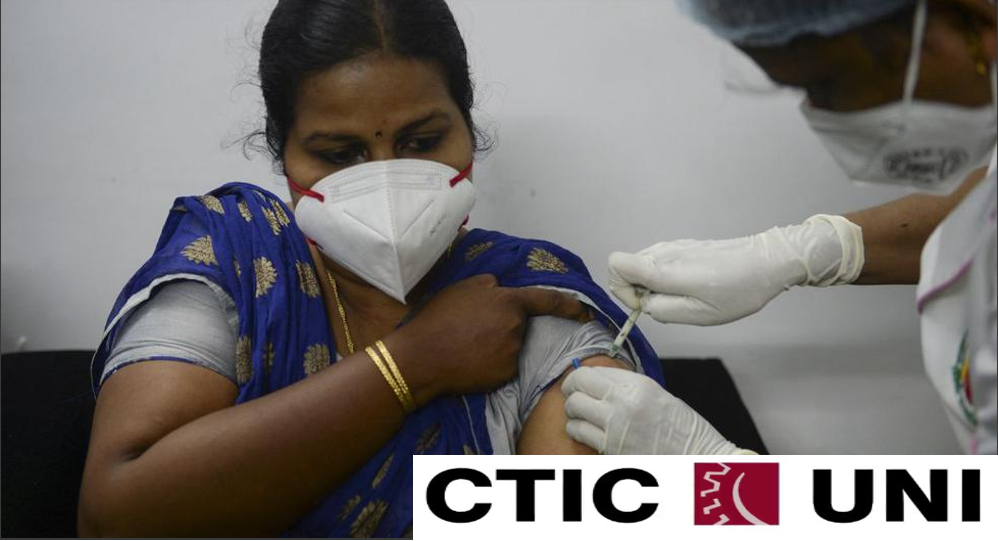

# **DISEÑO DE MODELO PREDICTIVO PARA DETECTAR DE MANERA TEMPRANA LA DIABETES EN MUJERES DE AL MENOS 21 AÑOS**

*Elaborado por: David Jesús Agapito Quiñones, Katia Fiorella Castilla Chauca, Ernesto Zhildeer Chura Flores  y Jorge Luis Pérez de la Vega.*


Para realización de este modelo predictivo se usara un conjunto de datos del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales. El objetivo del conjunto de datos es predecir diagnósticamente si un paciente tiene o no diabetes, basándose en determinadas mediciones diagnósticas incluidas en el conjunto de datos. Se impusieron varias restricciones a la selección de estos casos de una base de datos más amplia. En concreto, todos los pacientes son mujeres de al menos 21 años.

### Variables

- **Pregnancies**: Número de embarazos (tasa de fecundidad 2 hijos por mujer)[1]
- **Glucose**: Concentración de glucosa en plasma después de 2 horas de una prueba de tolerancia a la glucosa oral (mg/dL)[2]:
  - Normal: Menos de 140 mg/dL
  - Prediabetes: De 140 mg/dL a 199 mg/dL
  - Diabetes: Mayor a 200 mg/dl
- **BloodPressure**: Presión arterial diastólica (mmHg)[3]:
  - Normal: Menos de 80 mmHg
  - Hipertensión Etapa 1: De 80 mmHg a 90 mmHg
  - Hipertensión Etapa 2: Mayor a 90 mmHg
  - Crisis hipertensiva: Mayor a 120 mmHg
- **SkinThickness**: Grosor del pliegue cutáneo del tríceps (mm)
- **Insulin**: Insulina sérica a las 2 horas (mU/ml)[4]:
  - Diabetes Tipo I: De 5 mU/ml a 20 mU/ml
  - Normal: De 20 mU/ml a 30 mU/ml
  - Resistencia a insulina: 30 mU/ml a 150 mU/ml
  - Diabetes Tipo II: Mayor a 150 mU/ml
- **BMI**: Índice de masa corporal (peso en kg/(altura en m)^2)[5]:
  - Peso insuficiente: Menor de 18.5
  - Normal: De 18.5 a 24.9
  - Sobrepeso: De 25 a 29.9
  - Obesidad: Mayor a 30
- **DiabetesPedigreeFunction**: Indicador de la probabilidad de tener Diabetes según antecedentes familiares [6]
- **Age**: Edad (años)
- **Outcome**: Target que indica si un paciente tiene diabetes o no:
  - 1: Paciente con diabetes
  - 0: Paciente sin diabetes

***Recuperado de Kaggle:*** https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database?search=insulin

**Referencias**:
1. Banco Mundial.(2021).*Tasa de fertilidad, total (nacimientos por cada mujer) - India*. Recuperado de: https://datos.bancomundial.org/indicator/SP.DYN.TFRT.IN?locations=IN
2. MayoClinic.(2022).*Prueba de tolerancia a la glucosa*. Recuperado de: https://www.mayoclinic.org/es/tests-procedures/glucose-tolerance-test/about/pac-20394296
3. Williamson, L.(2023).*Presión arterial: ¿qué significan los números y por qué importan?*. Recuperado de: https://www.heart.org/en/news/2023/05/02/presion-arterial-que-significan-los-numeros-y-por-que-importan#:~:text=Seg%C3%BAn%20la%20American%20Heart%20Association,diast%C3%B3lica%20inferior%20a%2080%20mmHg.
4. Yáñez, R.(2022).*¿Cuánta es “Mucha” o “Poca” Insulina en la diabetes?*. Recuperado de: https://diabetesbien.com/cuanta-es-mucha-o-poca-insulina-en-la-diabetes/
5. CDC.(2021).*Cómo evaluar su peso*.Recuperado de: https://www.cdc.gov/healthyweight/spanish/assessing/index.html#:~:text=Si%20su%20IMC%20es%20menos,dentro%20del%20rango%20de%20sobrepeso.
6. Aparcana, A., García, V., Marres, M., Osorio, D., Velasquez, D.(2020).*DATADIABETES*. Recuperado de: https://rpubs.com/MMARRES/618010#:~:text=Funci%C3%B3n%20pedigr%C3%AD%20de%20la%20diabetes,negativo%20al%20diagn%C3%B3stico%20de%20diabetes.

In [ ]:
#Importamos las librerías

import sklearn
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import *
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.ticker import ScalarFormatter
import statsmodels.api as sm
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
sns.set(style="whitegrid", color_codes = True)
sns.set(rc={'figure.figsize':(10,6)})

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Regresión Logística

In [ ]:
# Cargamos la data

data = pd.read_csv("diabetes.csv")
target = 'Outcome'
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

###1. Análisis exploratorio (EDA)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# Cantidad de valores nulos

data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
# Cantidad de valores NaN

data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: xlabel='Outcome', ylabel='count'>

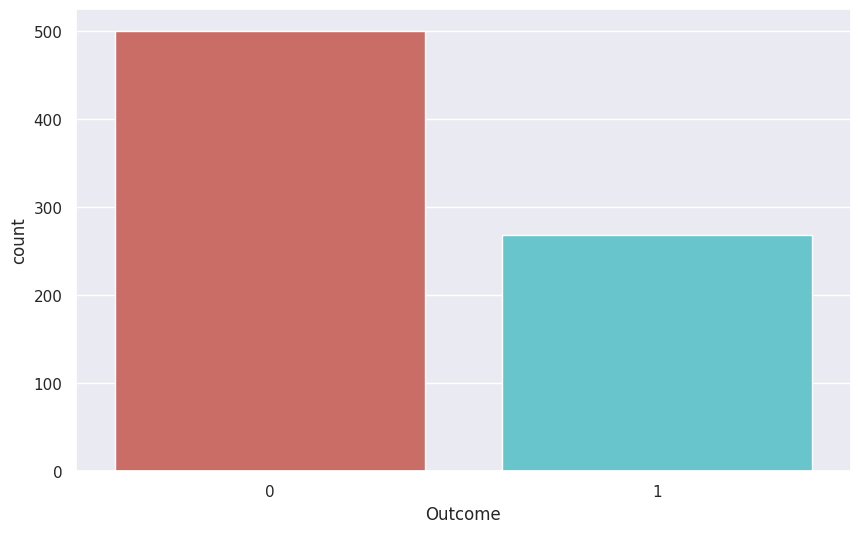

In [ ]:
sns.countplot(x='Outcome', data = data, palette = 'hls')

In [ ]:
data.Outcome.mean()

0.3489583333333333

###2. Muestreo

In [ ]:
train, test = train_test_split(data,
                               stratify = data['Outcome'],
                               train_size = 0.7,
                               random_state = 123)

###3.Tratamiento de variables

In [ ]:
# Analisis Univariado I

univariate = train[features].describe(percentiles = [0.05, 0.95]).transpose()
univariate.reset_index(drop = False, inplace = True)

univariate['missing_rate'] = 1 - univariate['count']/len(train)

univariate.rename(columns = {'index' : 'feature',
                             '5%': 'p5',
                             '50%' : 'median',
                             '95%': 'p95'}, inplace = True)
univariate.head()

,feature,count,mean,std,min,p5,median,p95,max,missing_rate
0,Pregnancies,537.0,3.873371,3.441784,0.0,0.0,3.0,10.0,17.0,0.0
1,Glucose,537.0,120.696462,32.113010,0.0,78.0,117.0,181.0,199.0,0.0
2,BloodPressure,537.0,69.141527,19.503504,0.0,36.4,72.0,90.4,114.0,0.0
3,SkinThickness,537.0,20.148976,15.930123,0.0,0.0,22.0,45.0,63.0,0.0
4,Insulin,537.0,78.627561,112.901370,0.0,0.0,37.0,286.2,846.0,0.0


In [ ]:
univariate

,feature,count,mean,std,min,p5,median,p95,max,missing_rate
0,Pregnancies,537.0,3.873371,3.441784,0.000,0.000,3.000,10.0000,17.00,0.0
1,Glucose,537.0,120.696462,32.113010,0.000,78.000,117.000,181.0000,199.00,0.0
2,BloodPressure,537.0,69.141527,19.503504,0.000,36.400,72.000,90.4000,114.00,0.0
3,SkinThickness,537.0,20.148976,15.930123,0.000,0.000,22.000,45.0000,63.00,0.0
4,Insulin,537.0,78.627561,112.901370,0.000,0.000,37.000,286.2000,846.00,0.0
5,BMI,537.0,31.966480,8.365382,0.000,21.100,32.000,45.0400,67.10,0.0
6,DiabetesPedigreeFunction,537.0,0.475408,0.331440,0.078,0.141,0.378,1.1556,2.42,0.0
7,Age,537.0,33.296089,12.018015,21.000,21.000,29.000,59.0000,81.00,0.0


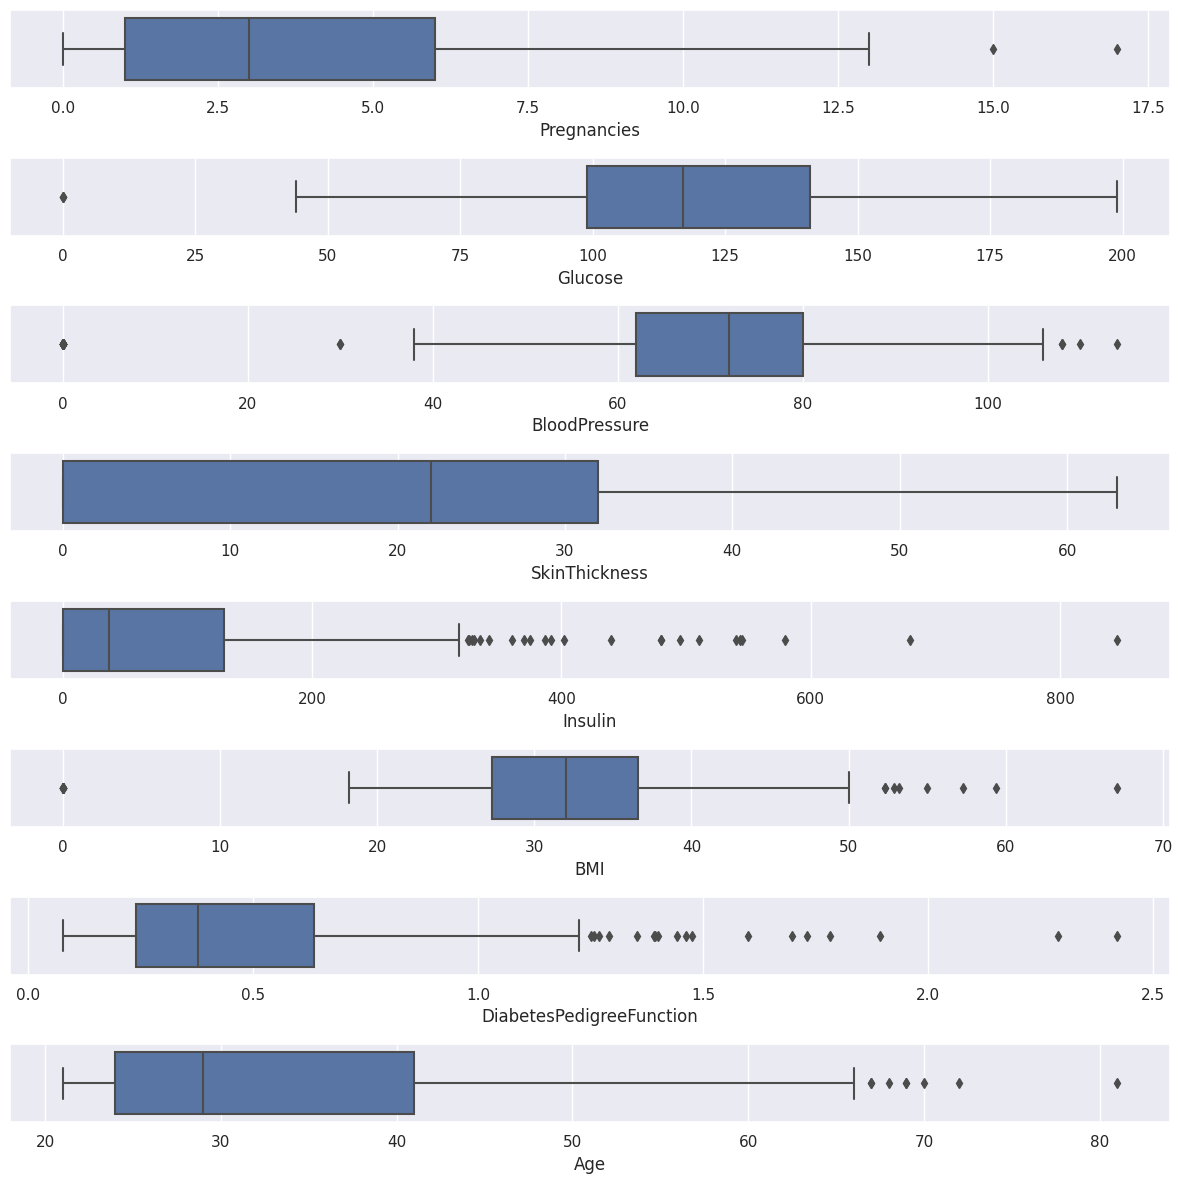

In [ ]:
# Boxplots

fig, axes = plt.subplots(nrows=8, ncols=1, figsize=(12, 12))

sns.boxplot(x = 'Pregnancies', data=train, ax=axes[0])
sns.boxplot(x = 'Glucose', data=train, ax=axes[1])
sns.boxplot(x = 'BloodPressure', data=train, ax=axes[2])
sns.boxplot(x = 'SkinThickness', data=train, ax=axes[3])
sns.boxplot(x = 'Insulin', data=train, ax=axes[4])
sns.boxplot(x = 'BMI', data=train, ax=axes[5])
sns.boxplot(x = 'DiabetesPedigreeFunction', data=train, ax=axes[6])
sns.boxplot(x = 'Age', data=train, ax=axes[7])

plt.tight_layout()

plt.show()

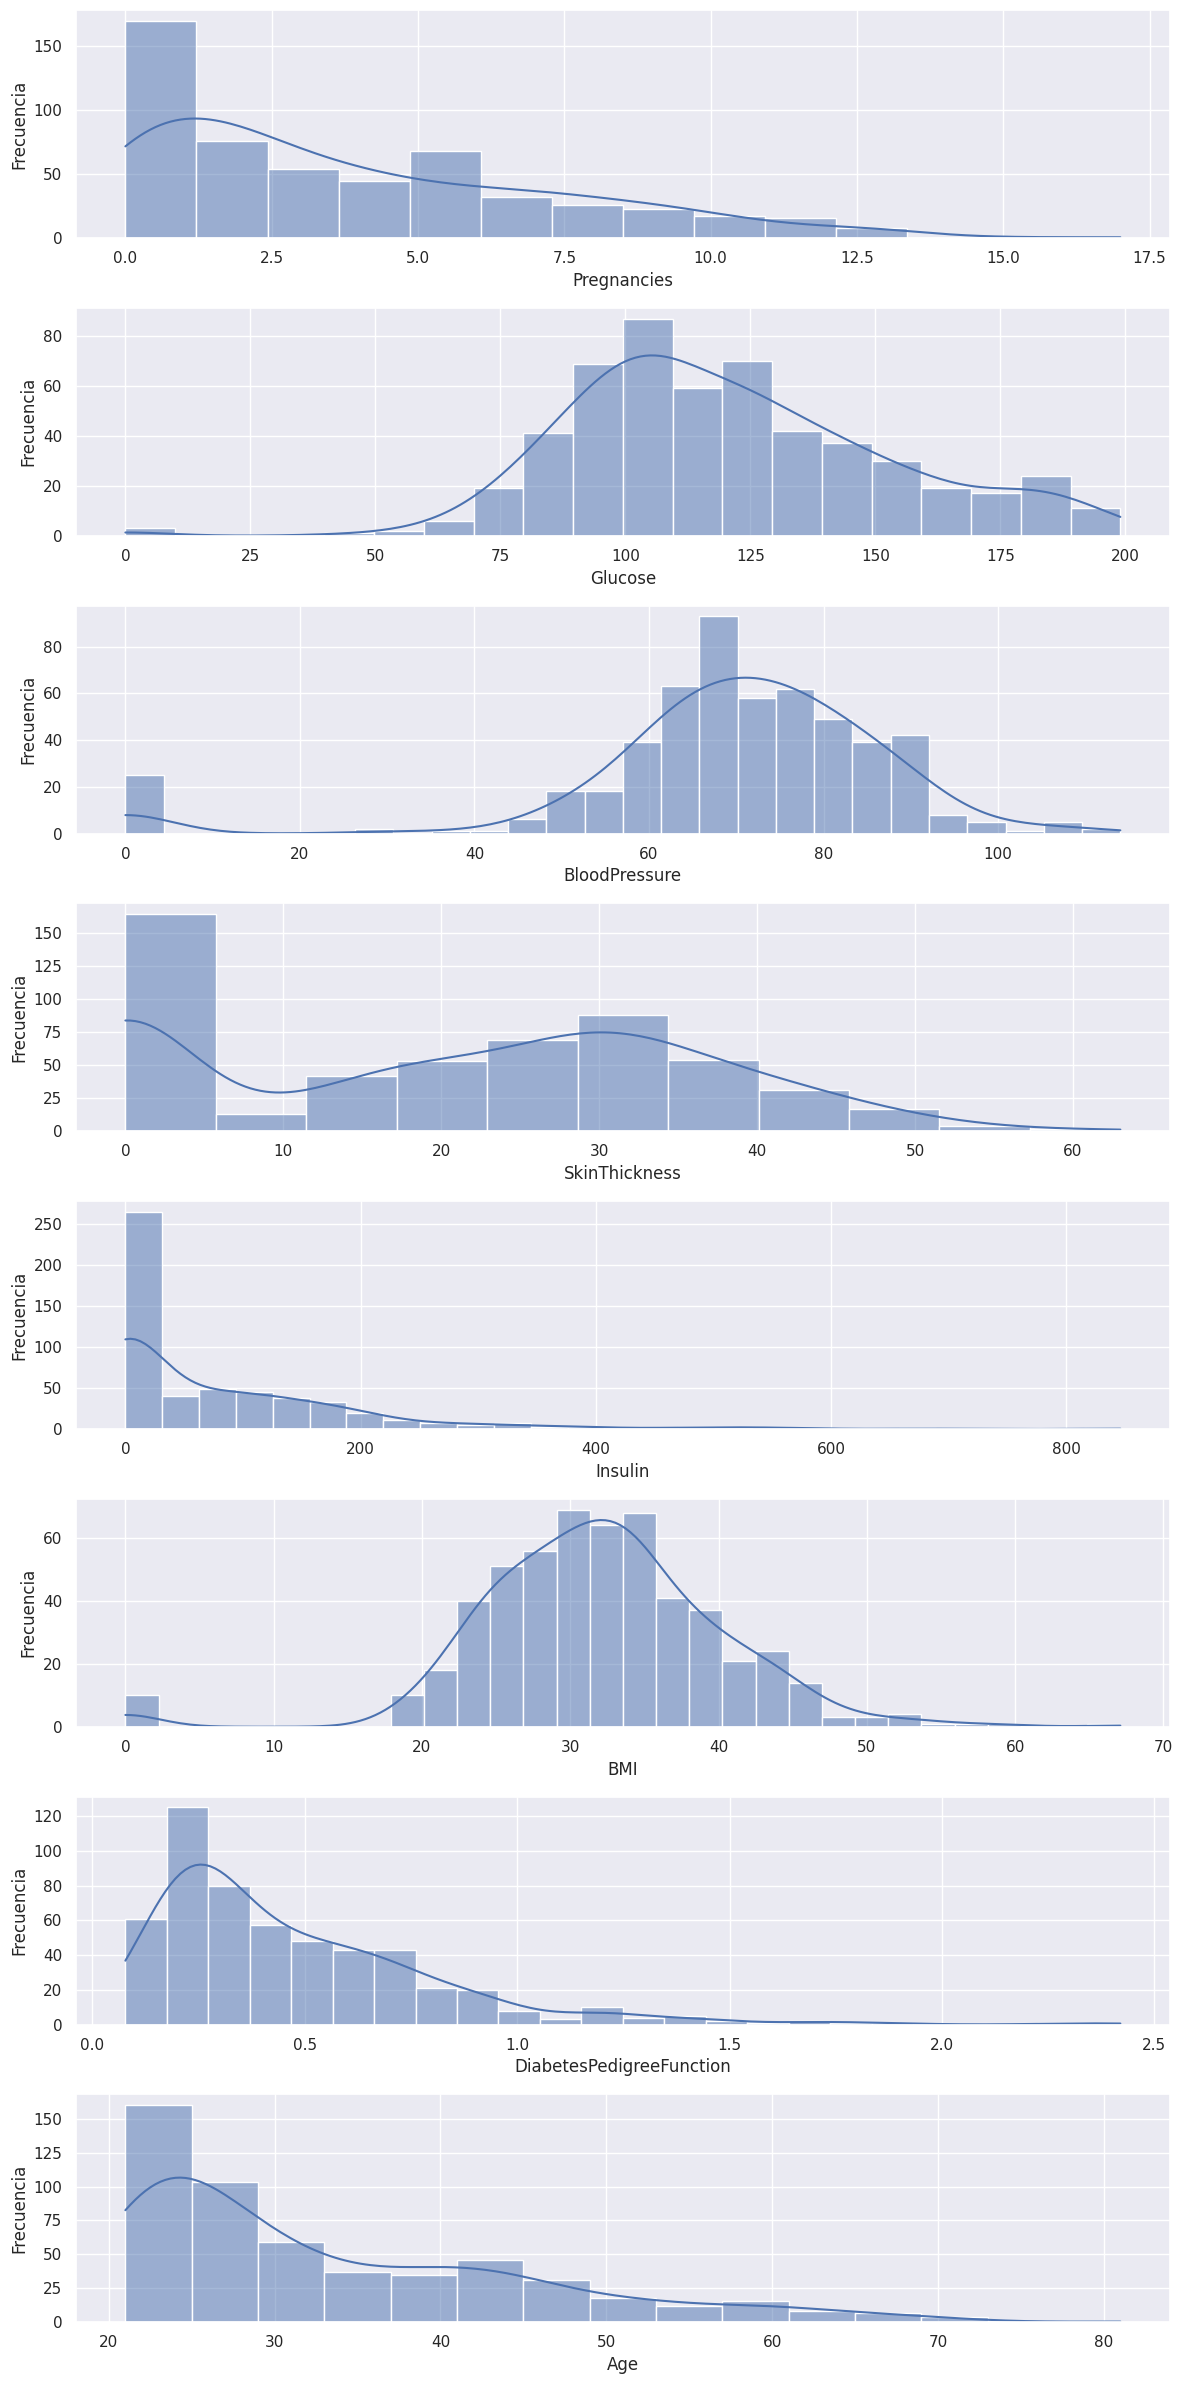

In [ ]:
fig, axes = plt.subplots(nrows=8, ncols=1, figsize=(12, 24))

variables = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
             'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

for i, variable in enumerate(variables):
    sns.histplot(data=train, x=variable, ax=axes[i], kde=True)
    axes[i].set_xlabel(variable)
    axes[i].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

###4. Outliers

In [ ]:
univariate.feature.tolist()

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [ ]:
# Tratamiento de outliers por percentiles

for col in univariate.feature.tolist():
    desc = univariate.loc[univariate.feature == col]

    lower_limit = desc.p5.values[0]
    upper_limit = desc.p95.values[0]

    train[col + '_t'] = train[col].apply(lambda x: lower_limit if x <= lower_limit else
                                                    upper_limit if x >= upper_limit else
                                                    x)

    test[col + '_t'] = test[col].apply(lambda x: lower_limit if x <= lower_limit else
                                               upper_limit if x >= upper_limit else
                                               x)

In [ ]:
train.columns.tolist()

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome',
 'Pregnancies_t',
 'Glucose_t',
 'BloodPressure_t',
 'SkinThickness_t',
 'Insulin_t',
 'BMI_t',
 'DiabetesPedigreeFunction_t',
 'Age_t']

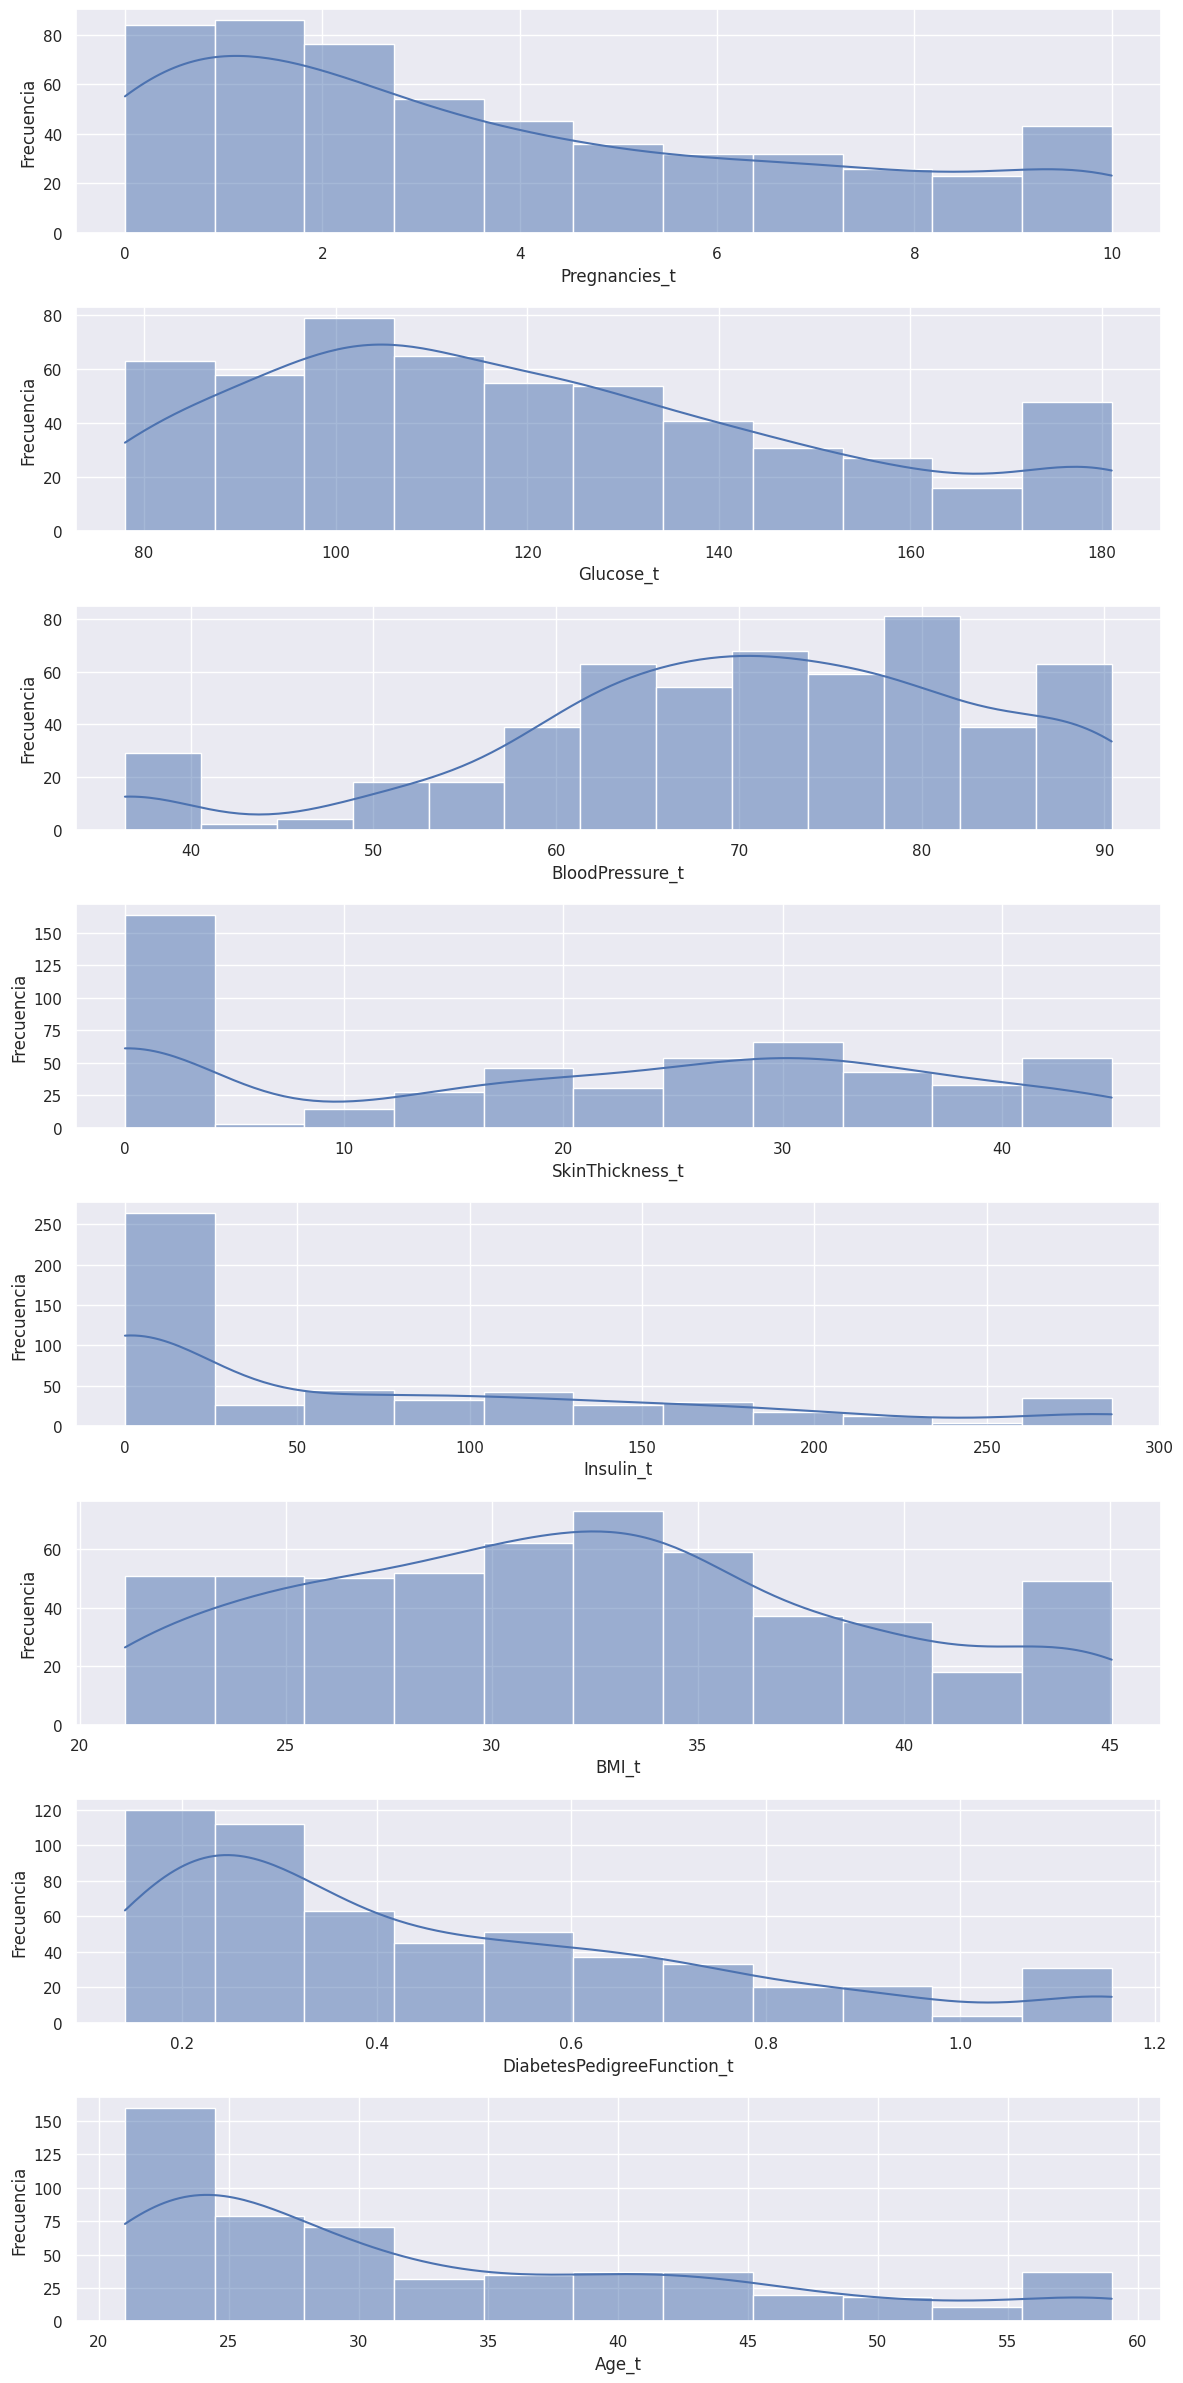

In [ ]:
fig, axes = plt.subplots(nrows=8, ncols=1, figsize=(12, 24))

variables = ['Pregnancies_t', 'Glucose_t', 'BloodPressure_t', 'SkinThickness_t',
             'Insulin_t', 'BMI_t', 'DiabetesPedigreeFunction_t', 'Age_t']

for i, variable in enumerate(variables):
    sns.histplot(data=train, x=variable, ax=axes[i], kde=True)
    axes[i].set_xlabel(variable)
    axes[i].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

###5. Preseleccion

In [ ]:
dfgini = pd.DataFrame({'feature': features,
                       'gini': [roc_auc_score(train.Outcome, train[col])*2-1 for col in features]})

dfgini['gini_abs'] = dfgini.gini.apply(lambda x: abs(x))

dfgini.sort_values(by = 'gini_abs', ascending = False)


,feature,gini,gini_abs
1,Glucose,0.588556,0.588556
5,BMI,0.376165,0.376165
7,Age,0.326646,0.326646
0,Pregnancies,0.192834,0.192834
2,BloodPressure,0.177341,0.177341
6,DiabetesPedigreeFunction,0.169748,0.169748
3,SkinThickness,0.119175,0.119175
4,Insulin,0.059725,0.059725


In [ ]:
univariate_II = pd.merge(univariate, dfgini, on = 'feature', how = 'left')
univariate_II.sort_values(by = 'gini_abs', ascending = False)

,feature,count,mean,std,min,p5,median,p95,max,missing_rate,gini,gini_abs
1,Glucose,537.0,120.696462,32.113010,0.000,78.000,117.000,181.0000,199.00,0.0,0.588556,0.588556
5,BMI,537.0,31.966480,8.365382,0.000,21.100,32.000,45.0400,67.10,0.0,0.376165,0.376165
7,Age,537.0,33.296089,12.018015,21.000,21.000,29.000,59.0000,81.00,0.0,0.326646,0.326646
0,Pregnancies,537.0,3.873371,3.441784,0.000,0.000,3.000,10.0000,17.00,0.0,0.192834,0.192834
2,BloodPressure,537.0,69.141527,19.503504,0.000,36.400,72.000,90.4000,114.00,0.0,0.177341,0.177341
6,DiabetesPedigreeFunction,537.0,0.475408,0.331440,0.078,0.141,0.378,1.1556,2.42,0.0,0.169748,0.169748
3,SkinThickness,537.0,20.148976,15.930123,0.000,0.000,22.000,45.0000,63.00,0.0,0.119175,0.119175
4,Insulin,537.0,78.627561,112.901370,0.000,0.000,37.000,286.2000,846.00,0.0,0.059725,0.059725


In [ ]:
# Criterios para seleccionar variables

print('initial features: ' + str(len(univariate_II)))
print('selected features: ' + str(len(univariate_II.loc[(univariate_II.gini_abs >= 0.05) & (univariate_II.missing_rate <= 0.50)])))
final_features = univariate_II.loc[(univariate_II.gini_abs >= 0.05) & (univariate_II.missing_rate <= 0.50)].feature.tolist()

initial features: 8
selected features: 8


###6. Estandarización

In [ ]:
train[[x + '_std' for x in final_features]] = (train[final_features] - train[final_features].mean())/train[final_features].std()
test[[x + '_std' for x in final_features]] = (test[final_features] - test[final_features].mean())/test[final_features].std()

###7. Regresión Logística

In [ ]:
# Fit and summarize OLS model
mod = sm.Logit(train.Outcome,
               sm.add_constant(train[[x + '_std' for x in final_features]]))
res = mod.fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.478536
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  537
Model:                          Logit   Df Residuals:                      528
Method:                           MLE   Df Model:                            8
Date:                Sat, 15 Jul 2023   Pseudo R-squ.:                  0.2596
Time:                        11:53:53   Log-Likelihood:                -256.97
converged:                       True   LL-Null:                       -347.09
Covariance Type:            nonrobust   LLR p-value:                 9.228e-35
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -0.8534      0.114     -7.456      0.000

In [ ]:
features = [x + '_std' for x in final_features]
features.remove('Age_std')

mod = sm.Logit(train.Outcome, sm.add_constant(train[features]))
res = mod.fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.478651
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  537
Model:                          Logit   Df Residuals:                      529
Method:                           MLE   Df Model:                            7
Date:                Sat, 15 Jul 2023   Pseudo R-squ.:                  0.2594
Time:                        12:13:02   Log-Likelihood:                -257.04
converged:                       True   LL-Null:                       -347.09
Covariance Type:            nonrobust   LLR p-value:                 1.853e-35
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -0.8509      0.114     -7.457      0.000

In [ ]:
features.remove('SkinThickness_std')
mod = sm.Logit(train.Outcome, sm.add_constant(train[features]))
res = mod.fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.478828
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  537
Model:                          Logit   Df Residuals:                      530
Method:                           MLE   Df Model:                            6
Date:                Sat, 15 Jul 2023   Pseudo R-squ.:                  0.2592
Time:                        12:13:04   Log-Likelihood:                -257.13
converged:                       True   LL-Null:                       -347.09
Covariance Type:            nonrobust   LLR p-value:                 3.540e-36
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -0.8519      0.114     -7.466      0.000

In [ ]:
features.remove('Insulin_std')
mod = sm.Logit(train.Outcome, sm.add_constant(train[features]))
res = mod.fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.480887
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  537
Model:                          Logit   Df Residuals:                      531
Method:                           MLE   Df Model:                            5
Date:                Sat, 15 Jul 2023   Pseudo R-squ.:                  0.2560
Time:                        12:13:06   Log-Likelihood:                -258.24
converged:                       True   LL-Null:                       -347.09
Covariance Type:            nonrobust   LLR p-value:                 1.657e-36
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -0.8545      0.114     -7.501      0.000

In [ ]:
features.remove('BloodPressure_std')
mod = sm.Logit(train.Outcome, sm.add_constant(train[features]))
res = mod.fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.484095
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  537
Model:                          Logit   Df Residuals:                      532
Method:                           MLE   Df Model:                            4
Date:                Sat, 15 Jul 2023   Pseudo R-squ.:                  0.2510
Time:                        12:13:55   Log-Likelihood:                -259.96
converged:                       True   LL-Null:                       -347.09
Covariance Type:            nonrobust   LLR p-value:                 1.276e-36
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -0.8530      0.113     -7.518      0.000

In [ ]:
pd.DataFrame(res.params)

,0
const,-0.852960
Pregnancies_std,0.368753
Glucose_std,1.086171
BMI_std,0.619410
DiabetesPedigreeFunction_std,0.236942


###8. Performance

In [ ]:
# Usando el modelo para predecir
train_II = train.copy()
test_II  = test.copy()

train_II['probability'] = res.predict(sm.add_constant(train[features]))
test_II['probability']  = res.predict(sm.add_constant(test[features]))

train_II['prediction'] = train_II['probability'].apply(lambda x: 1 if x > 0.5 else 0)
test_II['prediction']  = test_II['probability'].apply(lambda x: 1 if x > 0.5 else 0)

In [ ]:
test_II

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_t,...,Pregnancies_std,Glucose_std,BloodPressure_std,SkinThickness_std,Insulin_std,BMI_std,DiabetesPedigreeFunction_std,Age_std,probability,prediction
552,6,114,88,0,0,27.8,0.247,66,0,6.0,...,0.693620,-0.231957,0.996255,-1.339681,-0.683586,-0.639736,-0.653313,2.946308,0.197786,0
438,1,97,70,15,0,18.2,0.147,21,0,1.0,...,-0.868038,-0.768093,0.051358,-0.402283,-0.683586,-2.083683,-0.954842,-1.085135,0.028631,0
149,2,90,70,17,0,27.3,0.085,22,0,2.0,...,-0.555707,-0.988855,0.051358,-0.277297,-0.683586,-0.714941,-1.141790,-0.995547,0.054924,0
373,2,105,58,40,94,34.9,0.225,25,0,2.0,...,-0.555707,-0.515794,-0.578573,1.160047,0.095063,0.428183,-0.719650,-0.726784,0.178960,0
36,11,138,76,0,0,33.2,0.420,35,0,10.0,...,2.255278,0.524941,0.366324,-1.339681,-0.683586,0.172484,-0.131668,0.169092,0.651241,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,2,110,74,29,125,32.4,0.698,27,0,2.0,...,-0.555707,-0.358107,0.261335,0.472622,0.351851,0.052156,0.706583,-0.547609,0.223199,0
7,10,115,0,0,0,35.3,0.134,29,0,10.0,...,1.942946,-0.200420,-3.623242,-1.339681,-0.683586,0.488348,-0.994041,-0.368434,0.428683,0
298,14,100,78,25,184,36.6,0.412,46,1,10.0,...,3.192272,-0.673481,0.471312,0.222649,0.840578,0.683882,-0.155790,1.154556,0.494844,0
341,1,95,74,21,73,25.9,0.673,36,0,1.0,...,-0.868038,-0.831168,0.261335,-0.027324,-0.078890,-0.925517,0.631201,0.258679,0.075889,0


In [ ]:
# AUC

print('TRAIN AUC: %f' %(roc_auc_score(train.Outcome, train_II.probability)))
print('TEST AUC: %f' %(roc_auc_score(test.Outcome, test_II.probability)))

TRAIN AUC: 0.824125
TEST AUC: 0.856214


In [ ]:
# GINI

print('TRAIN GINI: %f' %(roc_auc_score(train.Outcome, train_II.probability)*2-1))
print('TEST GINI: %f' %(roc_auc_score(test.Outcome, test_II.probability)*2-1))

TRAIN GINI: 0.648251
TEST GINI: 0.712428


In [ ]:
# ACCURACY

print('TRAIN ACCURACY: %f' %(accuracy_score(train.Outcome, train_II.prediction)))
print('TEST ACCURACY: %f' %(accuracy_score(test.Outcome, test_II.prediction)))

TRAIN ACCURACY: 0.782123
TEST ACCURACY: 0.744589


In [ ]:
# PRECISION

print('TRAIN PRECISION: %f' %(precision_score(train.Outcome, train_II.prediction)))
print('TEST PRECISION: %f' %(precision_score(test.Outcome, test_II.prediction)))

TRAIN PRECISION: 0.743056
TEST PRECISION: 0.683333


In [ ]:
# RECALL

print('TRAIN RECALL: %f' %(recall_score(train.Outcome, train_II.prediction)))
print('TEST RECALL: %f' %(recall_score(test.Outcome, test_II.prediction)))

TRAIN RECALL: 0.572193
TEST RECALL: 0.506173


In [ ]:
# F1-SCORE

print('TRAIN F1-SCORE: %f' %(f1_score(train.Outcome, train_II.prediction)))
print('TEST F1-SCORE: %f' %(f1_score(test.Outcome, test_II.prediction)))

TRAIN F1-SCORE: 0.646526
TEST F1-SCORE: 0.581560


In [ ]:
confusion_matrix(train.Outcome, train_II.prediction)

array([[313,  37],
       [ 80, 107]])

In [ ]:
confusion_matrix(test.Outcome, test_II.prediction)

array([[131,  19],
       [ 40,  41]])

**Resumen Modelo de prediccion que una mujer de al menos de 21 años padecerá de diabetes**


---



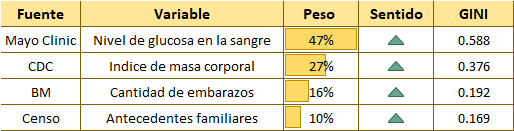

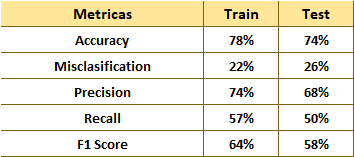

In [ ]:
"""
####################
# Resumen MODELO 1 #
####################

# Features
Pregnancies_std
Glucose_std
BloodPressure_std
BMI_std
DiabetesPedigreeFunction_std

===============================================

TRAIN AUC: 0.826784
TEST AUC: 0.860082

===============================================

TRAIN GINI: 0.653568
TEST GINI: 0.720165

===============================================

TRAIN ACCURACY: 0.780261
TEST ACCURACY: 0.757576

===============================================

TRAIN PRECISION: 0.737931
TEST PRECISION: 0.698413

===============================================

TRAIN RECALL: 0.572193
TEST RECALL: 0.543210

===============================================

TRAIN F1-SCORE: 0.644578
TEST F1-SCORE: 0.611111

===============================================

TRAIN
array([[312,  38],
       [ 80, 107]])

TEST
array([[131,  19],
       [ 37,  44]])

####################
# Resumen MODELO 1 #
####################

"""

' \n\n# Resumen \n\n# Features \nPregnancies_std\nGlucose_std\nBloodPressure_std\nBMI_std\nDiabetesPedigreeFunction_std\n\n===============================================\n\nTRAIN AUC: 0.826784\nTEST AUC: 0.860082\n\n===============================================\n\nTRAIN GINI: 0.653568\nTEST GINI: 0.720165\n\n===============================================\n\nTRAIN ACCURACY: 0.780261\nTEST ACCURACY: 0.757576\n\n===============================================\n\nTRAIN PRECISION: 0.737931\nTEST PRECISION: 0.698413\n\n===============================================\n\nTRAIN RECALL: 0.572193\nTEST RECALL: 0.543210\n\n===============================================\n\nTRAIN F1-SCORE: 0.644578\nTEST F1-SCORE: 0.611111\n\n===============================================\n\nTRAIN\narray([[312,  38],\n       [ 80, 107]])\n\nTEST\narray([[131,  19],\n       [ 37,  44]])\n\n'

## ÁRBOLES DE CLASIFICACIÓN

In [ ]:
data = pd.read_csv("diabetes.csv")

NameError: ignored

In [ ]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
max_depth = 3

In [ ]:
min_samples_split = 30

In [ ]:
model = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split)

In [ ]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_split=30)

In [ ]:
predictions = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

In [ ]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1:", f1)

Accuracy: 0.7597402597402597
Precision: 0.68
Recall: 0.6181818181818182
F1: 0.6476190476190475


In [ ]:
class_names = ['No diabetes', 'Diabetes']
feature_names = X.columns

In [ ]:
print("\nResultados de la clasificación:")
for i, prediction in enumerate(predictions[:10]):
    print("Paciente {}: Predicción = {}, Etiqueta real = {}".format(i+1, class_names[prediction], class_names[y_test.iloc[i]]))


Resultados de la clasificación:
Paciente 1: Predicción = No diabetes, Etiqueta real = No diabetes
Paciente 2: Predicción = No diabetes, Etiqueta real = No diabetes
Paciente 3: Predicción = No diabetes, Etiqueta real = No diabetes
Paciente 4: Predicción = No diabetes, Etiqueta real = No diabetes
Paciente 5: Predicción = No diabetes, Etiqueta real = No diabetes
Paciente 6: Predicción = No diabetes, Etiqueta real = No diabetes
Paciente 7: Predicción = No diabetes, Etiqueta real = No diabetes
Paciente 8: Predicción = No diabetes, Etiqueta real = No diabetes
Paciente 9: Predicción = Diabetes, Etiqueta real = No diabetes
Paciente 10: Predicción = Diabetes, Etiqueta real = No diabetes


In [ ]:
print("\nCaracterísticas utilizadas:")
for feature in feature_names:
    print("- {}".format(feature))


Características utilizadas:
- Pregnancies
- Glucose
- BloodPressure
- SkinThickness
- Insulin
- BMI
- DiabetesPedigreeFunction
- Age


In [ ]:
feature_importance = model.feature_importances_
feature_names = X.columns

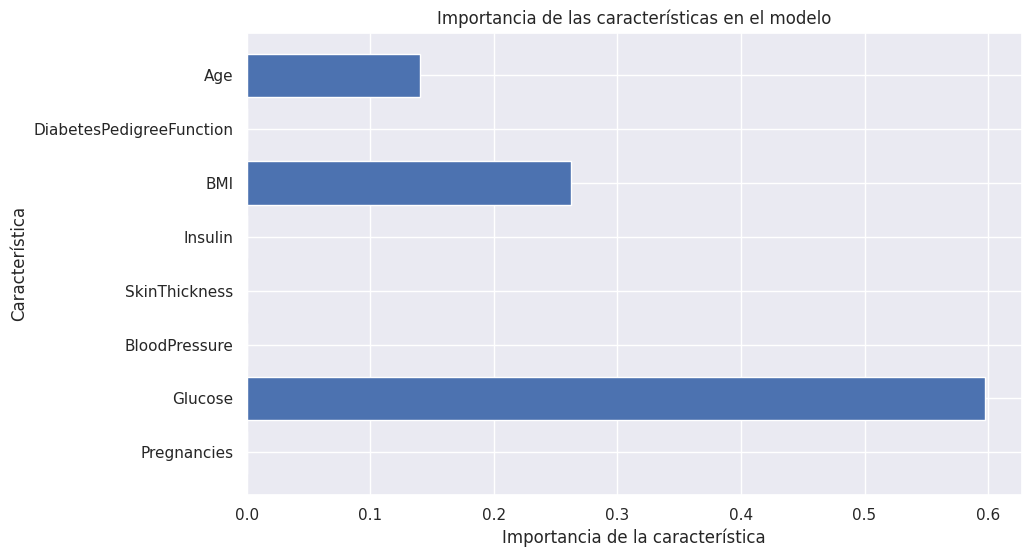

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance, align='center')
plt.yticks(range(len(feature_importance)), feature_names)
plt.xlabel("Importancia de la característica")
plt.ylabel("Característica")
plt.title("Importancia de las características en el modelo")
plt.show()

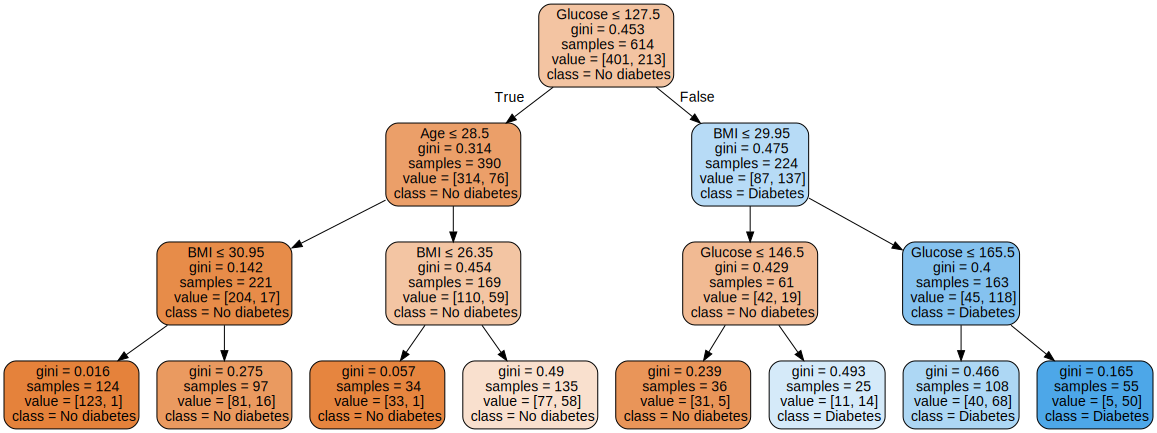

In [ ]:
dot_data = export_graphviz(model, out_file=None, feature_names=X.columns, class_names=['No diabetes', 'Diabetes'], filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render('diabetes_tree', format='png', cleanup=True)
graph

In [ ]:
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'], filled=True)
plt.show()

NameError: ignored

## KNN

### 1. Leyendo los datos

In [ ]:
data = pd.read_csv('diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### 2. Análisis exploratorio

In [ ]:
len(data)

768

In [ ]:
data['Outcome'].value_counts(normalize=True) * 100

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

<div class="comment" style="background-color: rgb(255, 255, 224); padding: 10px; border: 2px ridge red;">
La proporción de pacientes que tienen diabetes es menor en el dataset. Para la evaluación de resultados se considerará un escenario aplicando estratificación y en el otro no.
</div>

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<div class="comment" style="background-color: rgb(255, 255, 224); padding: 10px; border: 2px ridge red;">
No se encuentran valores nulos en el dataset.
</div>

In [ ]:
data['Outcome'] = data['Outcome'].astype('category')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               768 non-null    int64   
 1   Glucose                   768 non-null    int64   
 2   BloodPressure             768 non-null    int64   
 3   SkinThickness             768 non-null    int64   
 4   Insulin                   768 non-null    int64   
 5   BMI                       768 non-null    float64 
 6   DiabetesPedigreeFunction  768 non-null    float64 
 7   Age                       768 non-null    int64   
 8   Outcome                   768 non-null    category
dtypes: category(1), float64(2), int64(6)
memory usage: 49.0 KB


<div class="comment" style="background-color: rgb(255, 255, 224); padding: 10px; border: 2px ridge red;">
Se convirtió en categórica la variable Outcome ya que 0 y 1 no presentan una relación numérica en el contexto de la presencia de diabetes.
</div>

In [ ]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00


In [ ]:
features = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

In [ ]:
features_with_zero = ['Glucose', 'BloodPressure','SkinThickness','Insulin','BMI']
print(data[features_with_zero].isin({0}).sum())

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64


<div class="comment" style="background-color: rgb(255, 255, 224); padding: 10px; border: 2px ridge red;">
Presencia de valores 0 en las variables Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin y BMI. De acuerdo al origen del dataset, los valores 0 indicarían datos perdidos, por lo que se le dará un tratamiento de missings a aquellas variables que hagan sentido no tener el valor 0 (features_with_zero). En este caso Pregnancies igual a 0 es posible ya que una paciente puede no tener embarazos.
</div>

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>, <Axes: >]], dtype=object)

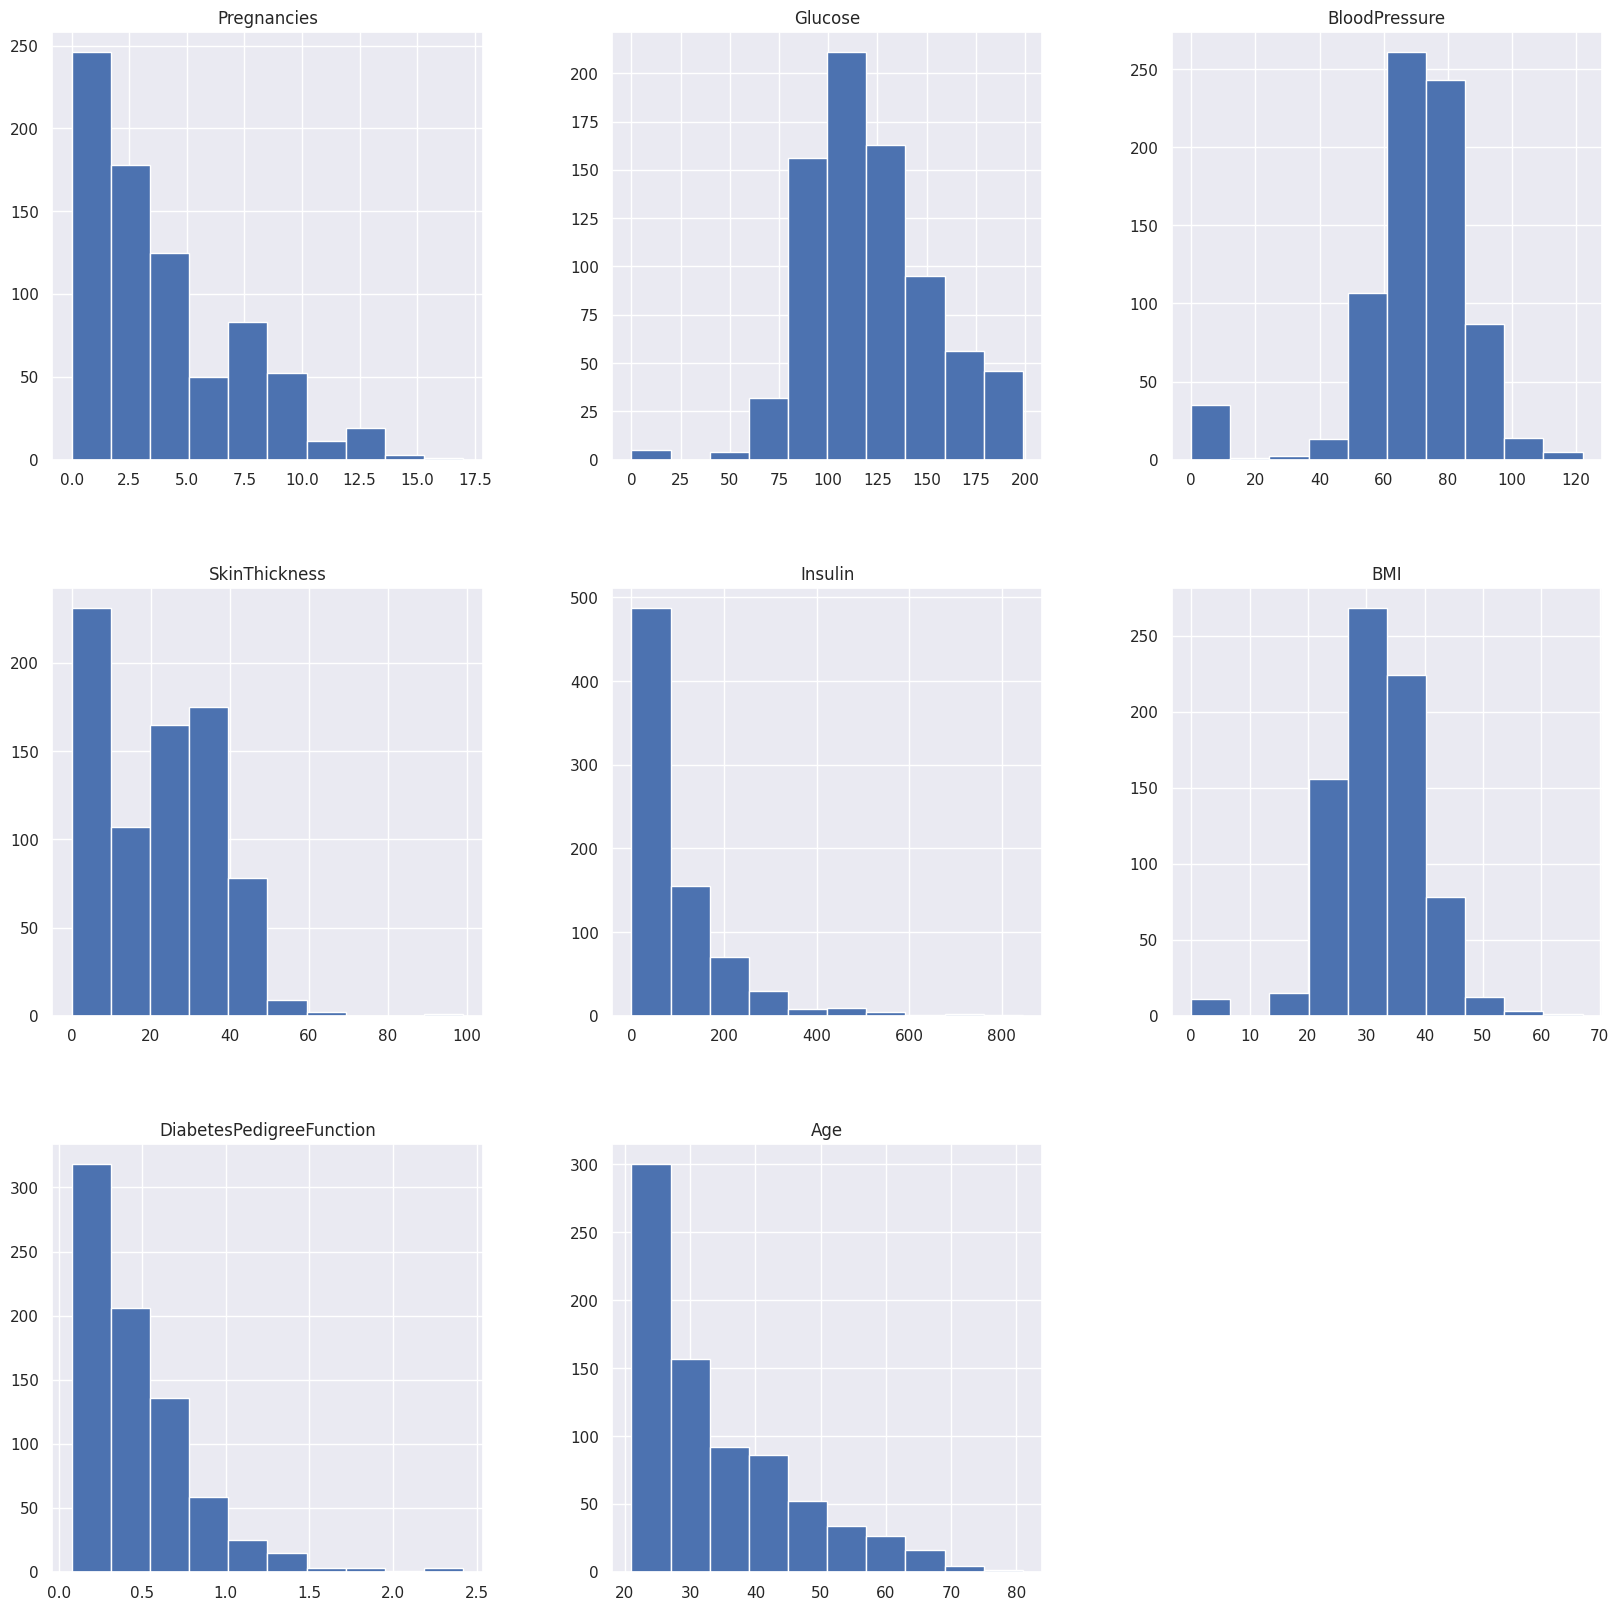

In [ ]:
### Histograma
data.hist(figsize = (20,20))

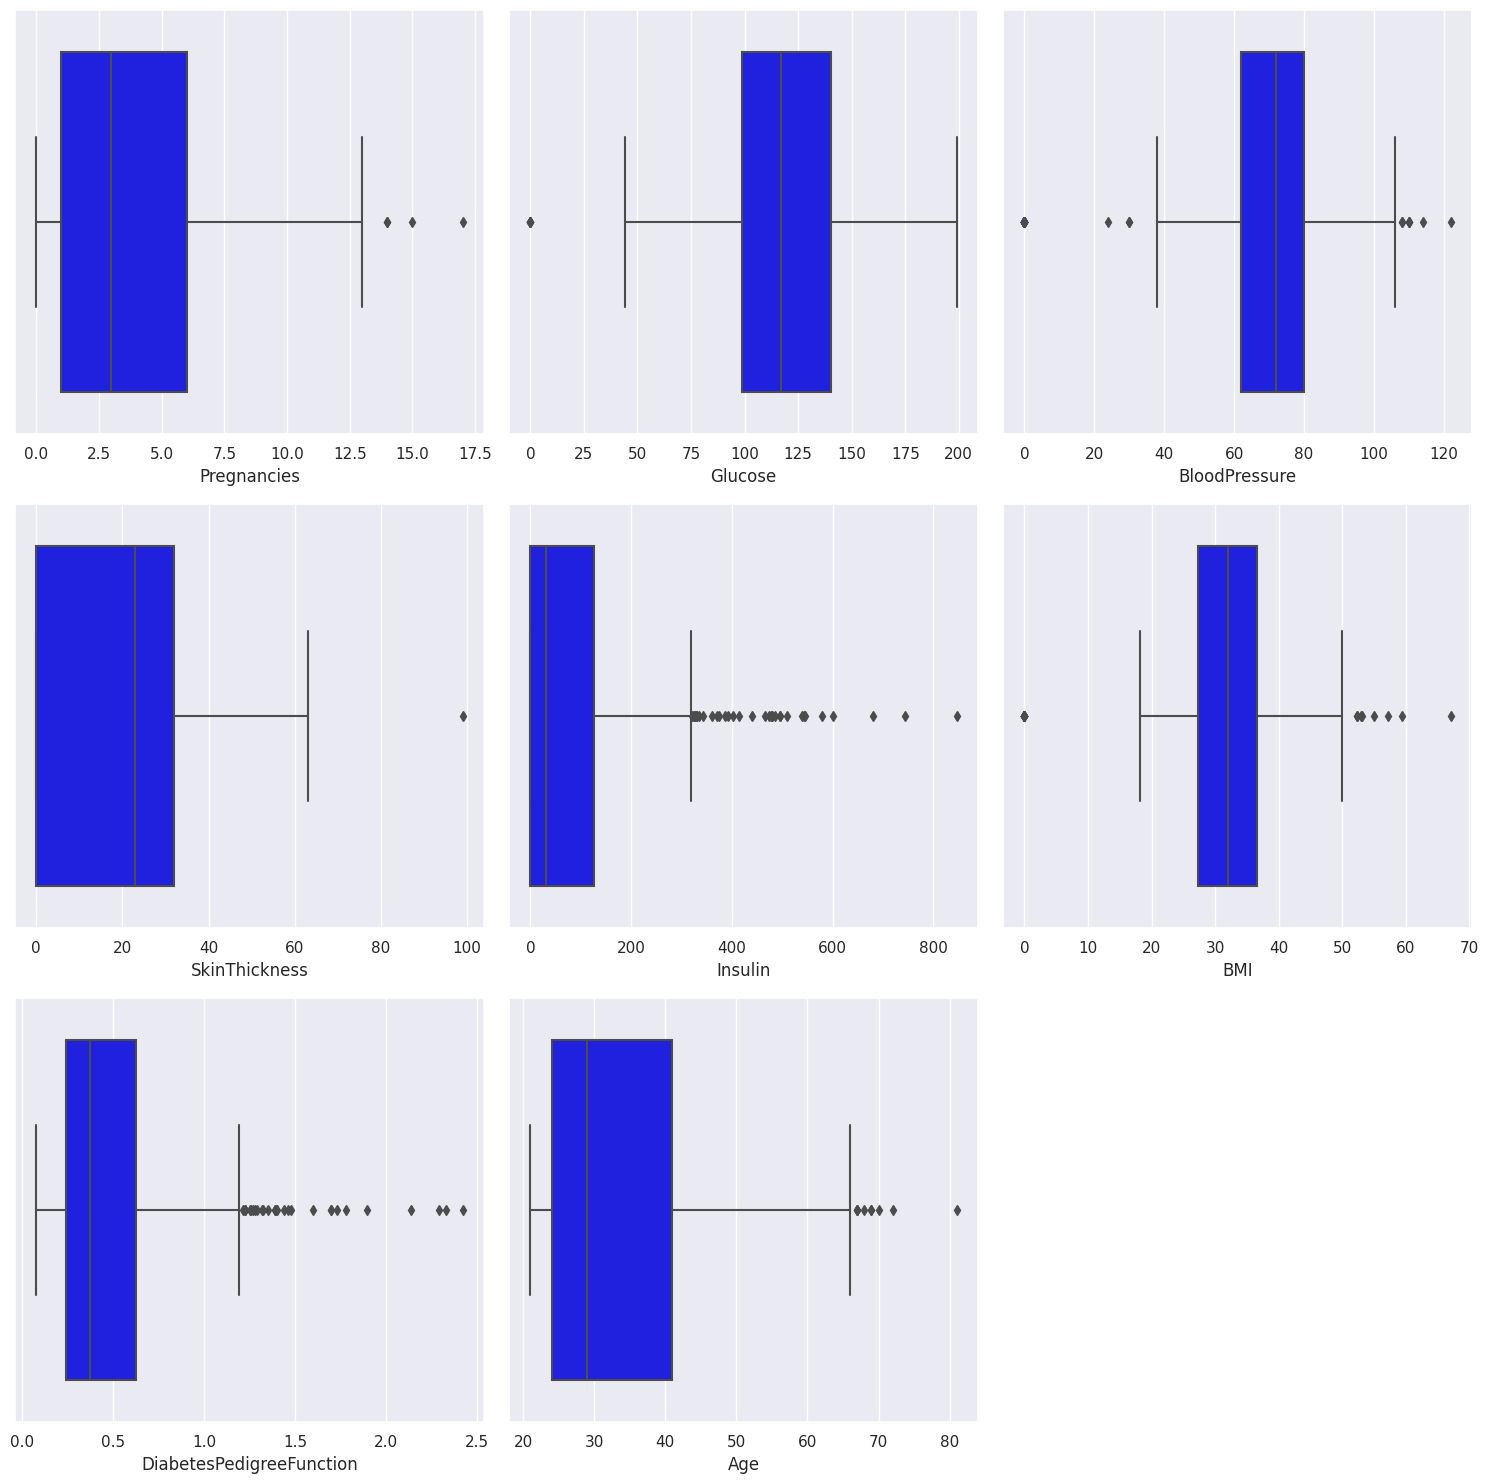

In [ ]:
### Diagrama de cajas
num_columns = len(data.columns)
num_rows = (num_columns + 2) // 3
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
for i, column in enumerate(data.columns):
    if data[column].dtype != 'category':
        row = i // 3
        col = i % 3
        ax = axes[row, col]
        sns.boxplot(x=column, data=data, color='blue', ax=ax)
        ax.set_xlabel(column)
empty_ax = axes[-1, -1]
empty_ax.axis('off')
plt.tight_layout()
plt.show()

<div class="comment" style="background-color: rgb(255, 255, 224); padding: 10px; border: 2px ridge red;">
Presencia de valores atípicos en las variables del dataset, por lo que se le dará un tratamiento por outliers utilizando el IQR, ya que la mayoría de variables presentan una distribución asimétrica.
</div>

<Axes: >

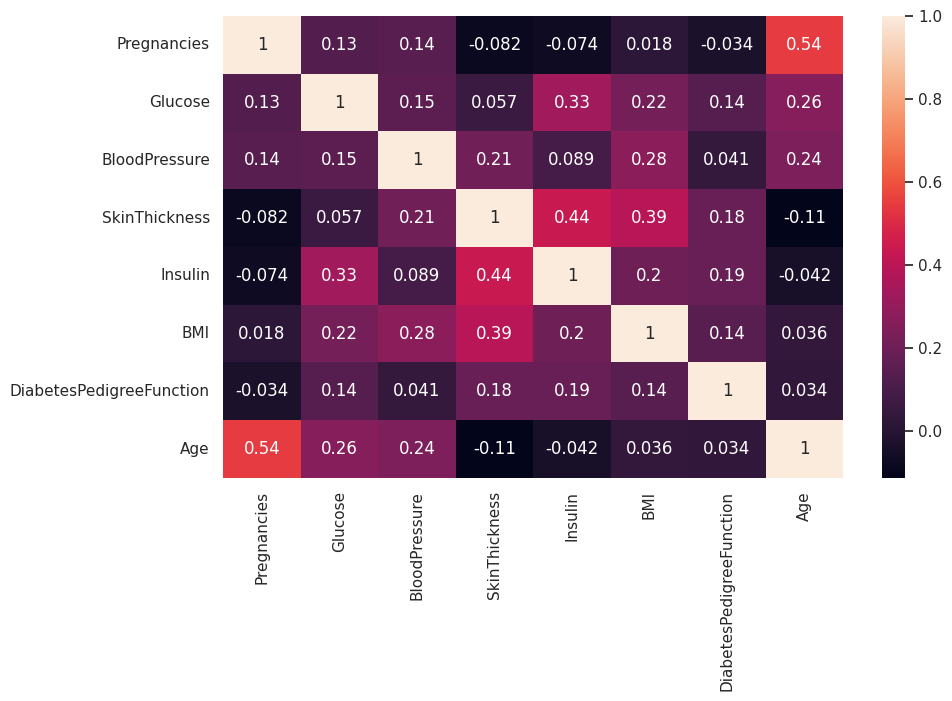

In [ ]:
### Correlación entre variables
correlation_matrix=data.drop('Outcome', axis=1).corr()
sns.heatmap(correlation_matrix, annot=True)

<div class="comment" style="background-color: rgb(255, 255, 224); padding: 10px; border: 2px ridge red;">

- Se observa una correlación fuerte y positiva entre las variables Age y Pregnancies (0.54), lo cual hace sentido que a mayor edad mayor sea el número de embarazos que pueda haber tenido la paciente.

- Se observa una correlación moderada y positiva entre las variables Insulin y SkinThickness (0.44), lo cual hace sentido ya que a niveles altos de insulina podría favorecer la acumulación de grasa en el cuerpo, lo cual puede contribuir al aumento del grosor del pliegue cutáneo del tríceps.

- Se observa una correlación moderada y positiva entre las variables Glucose e Insulin (0.33), lo cual indica que el dataset podría contener en su mayoría pacientes con Diabetes Tipo II, que consiste en que los pacientes producen una cantidad alta en insulina para regular el nivel de glucosa en sangre, sin embargo, existe algún bloqueante que no permita el pase de la glucosa a las células. Por lo general esta relación es inversamente proporcional ya que a mayor cantidad de insulina menor nivel de glucosa en sangre y cuando se tiene una poca producción de insulina es que se presenta la Diabetes Tipo I.

No se aplicará una reducción de variables por correlación ya que las correlaciones entre variables no son determinantes y se consideran apriori importantes para la construcción del modelo.
</div>

<div class="comment" style="background-color: rgb(255, 255, 224); padding: 10px; border: 2px ridge red;">

**Resultado de análisis**

1. En base a la proporción de valores del target se considerará aplicar una estratificación al hacer el muestreo.
2. Se aplicará un tratamiento de missings por presencia de valores cero en las variables que corresponda de acuerdo a su significado.
3. Se aplicará un tratamiento de outliers por presencia de valores atípicos en las variables, se considerará el IQR.
4. No se aplicará una preselección de variables por correlación ya que se cuentan con pocas, no se evidencia correlaciones determinantes entre ellas y se consideran importantes en la predicción de diabetes. Se usará el GINI.
</div>

### 3. Tratamiento de missings

In [ ]:
for feature in features_with_zero:
  data[feature]=data[feature].replace(0,data[feature].median())

In [ ]:
print(data[features_with_zero].isin({0}).sum())

Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64


<div class="comment" style="background-color: rgb(255, 255, 224); padding: 10px; border: 2px ridge red;">
Se reemplazaron los valores cero por la mediana en cada variable que hace sentido no tener ceros.
</div>

### 4. Muestreo

In [ ]:
# Muestreo sin stratify
train, test = train_test_split(data,
                               train_size = 0.7,
                               random_state = 123)

In [ ]:
train['Outcome'].value_counts(normalize=True) * 100

0    66.480447
1    33.519553
Name: Outcome, dtype: float64

In [ ]:
test['Outcome'].value_counts(normalize=True) * 100

0    61.904762
1    38.095238
Name: Outcome, dtype: float64

In [ ]:
# Muestreo con stratify
train_s, test_s = train_test_split(data,
                                   stratify = data['Outcome'],
                                   train_size = 0.7,
                                   random_state = 123)

In [ ]:
train_s['Outcome'].value_counts(normalize=True) * 100

0    65.176909
1    34.823091
Name: Outcome, dtype: float64

In [ ]:
test_s['Outcome'].value_counts(normalize=True) * 100

0    64.935065
1    35.064935
Name: Outcome, dtype: float64

<div class="comment" style="background-color: rgb(255, 255, 224); padding: 10px; border: 2px ridge red;">
Se realizó el muestreo con un 70% para train y 30% para test. Al aplicar stratify no se observa un cambio significativo en las proporciones de valores del target tanto para el train como para el test.
</div>

### 5. Tratamiento de outliers

In [ ]:
# Utilizando el rango intercuartílico (IQR)
predictors = train.drop('Outcome', axis=1)
q1 = predictors.quantile(0.25)
q3 = predictors.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
predictors = predictors.clip(lower_bound, upper_bound, axis=1)
train = pd.concat([predictors, train['Outcome']], axis=1)

predictors = test.drop('Outcome', axis=1)
q1 = predictors.quantile(0.25)
q3 = predictors.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
predictors = predictors.clip(lower_bound, upper_bound, axis=1)
test = pd.concat([predictors, test['Outcome']], axis=1)

predictors = train_s.drop('Outcome', axis=1)
q1 = predictors.quantile(0.25)
q3 = predictors.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
predictors = predictors.clip(lower_bound, upper_bound, axis=1)
train_s = pd.concat([predictors, train_s['Outcome']], axis=1)

predictors = test_s.drop('Outcome', axis=1)
q1 = predictors.quantile(0.25)
q3 = predictors.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
predictors = predictors.clip(lower_bound, upper_bound, axis=1)
test_s = pd.concat([predictors, test_s['Outcome']], axis=1)

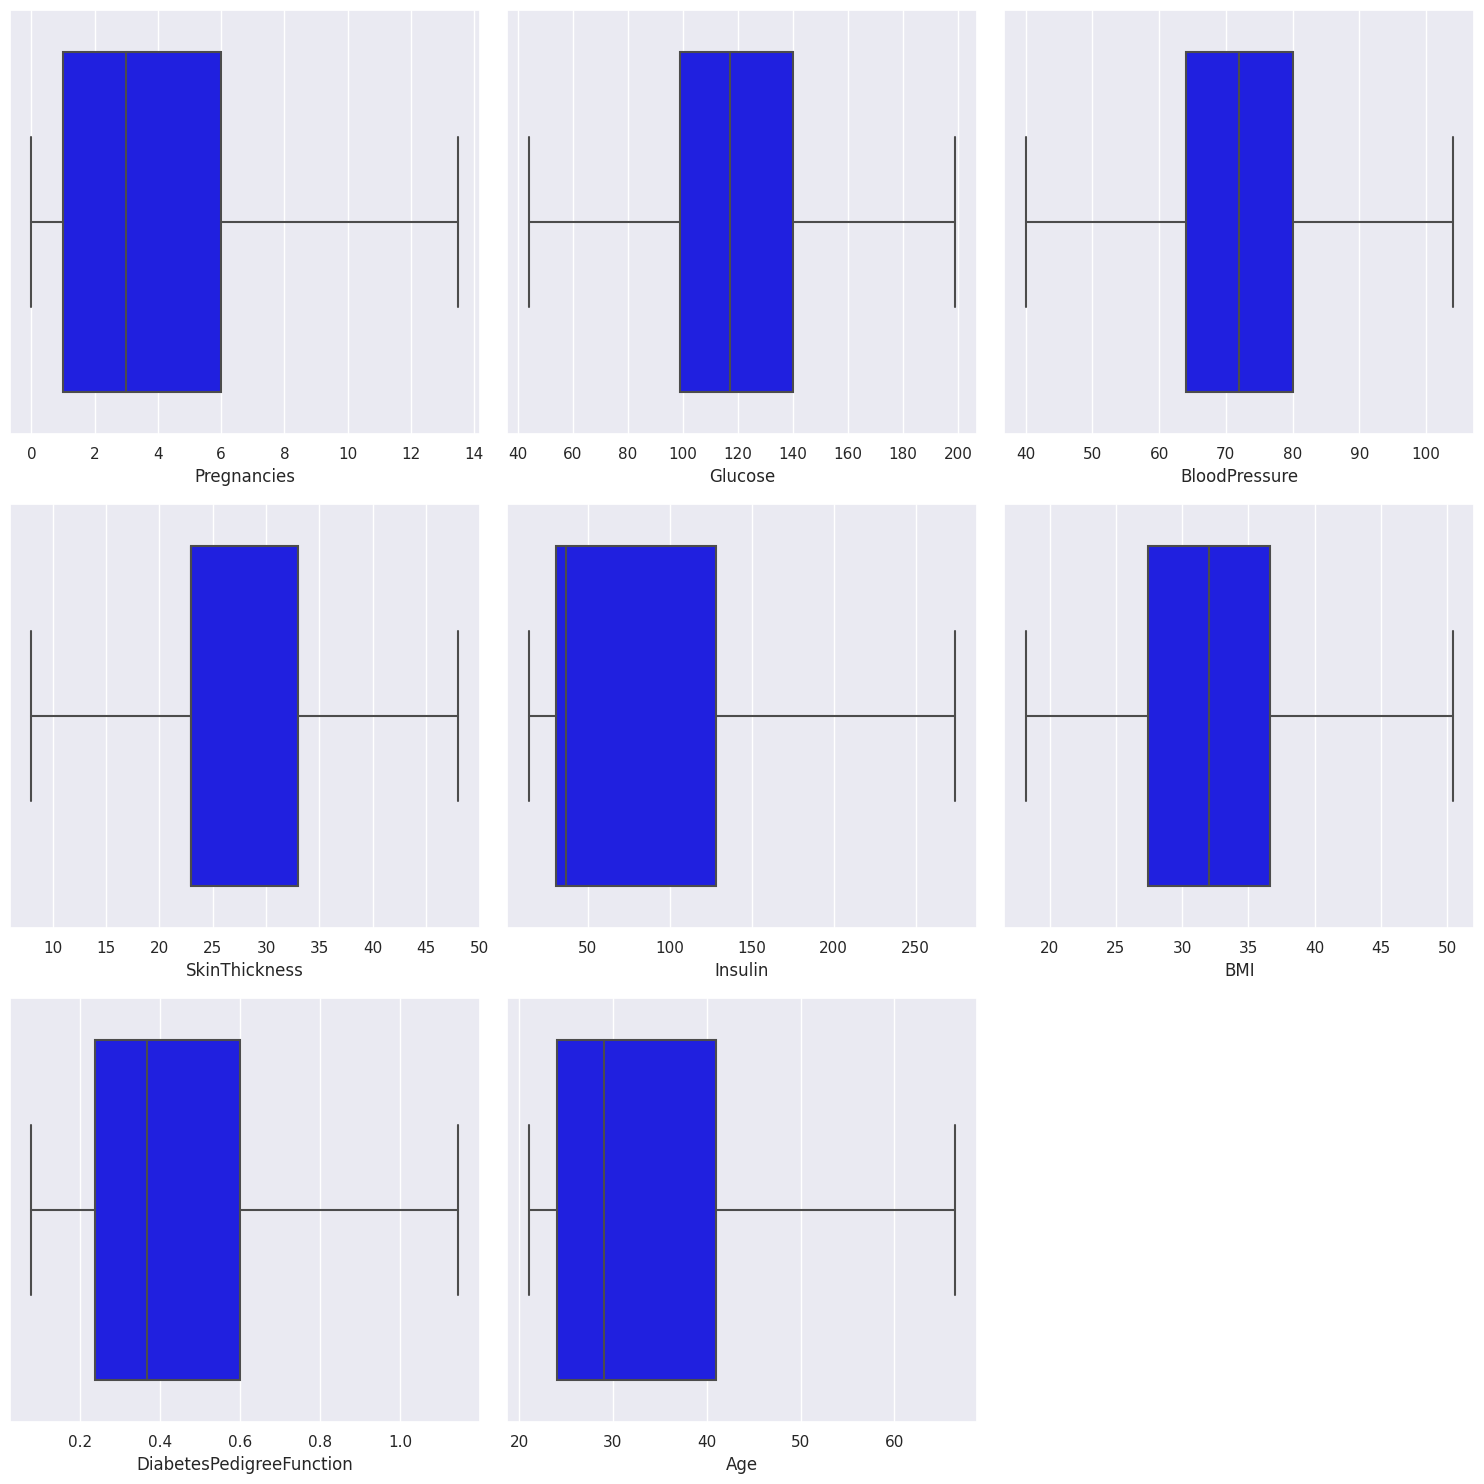

In [ ]:
### Diagrama de cajas luego del tratamiento train
num_columns = len(train.columns)
num_rows = (num_columns + 2) // 3
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
for i, column in enumerate(train.columns):
    if train[column].dtype != 'category':
        row = i // 3
        col = i % 3
        ax = axes[row, col]
        sns.boxplot(x=column, data=train, color='blue', ax=ax)
        ax.set_xlabel(column)
empty_ax = axes[-1, -1]
empty_ax.axis('off')
plt.tight_layout()
plt.show()

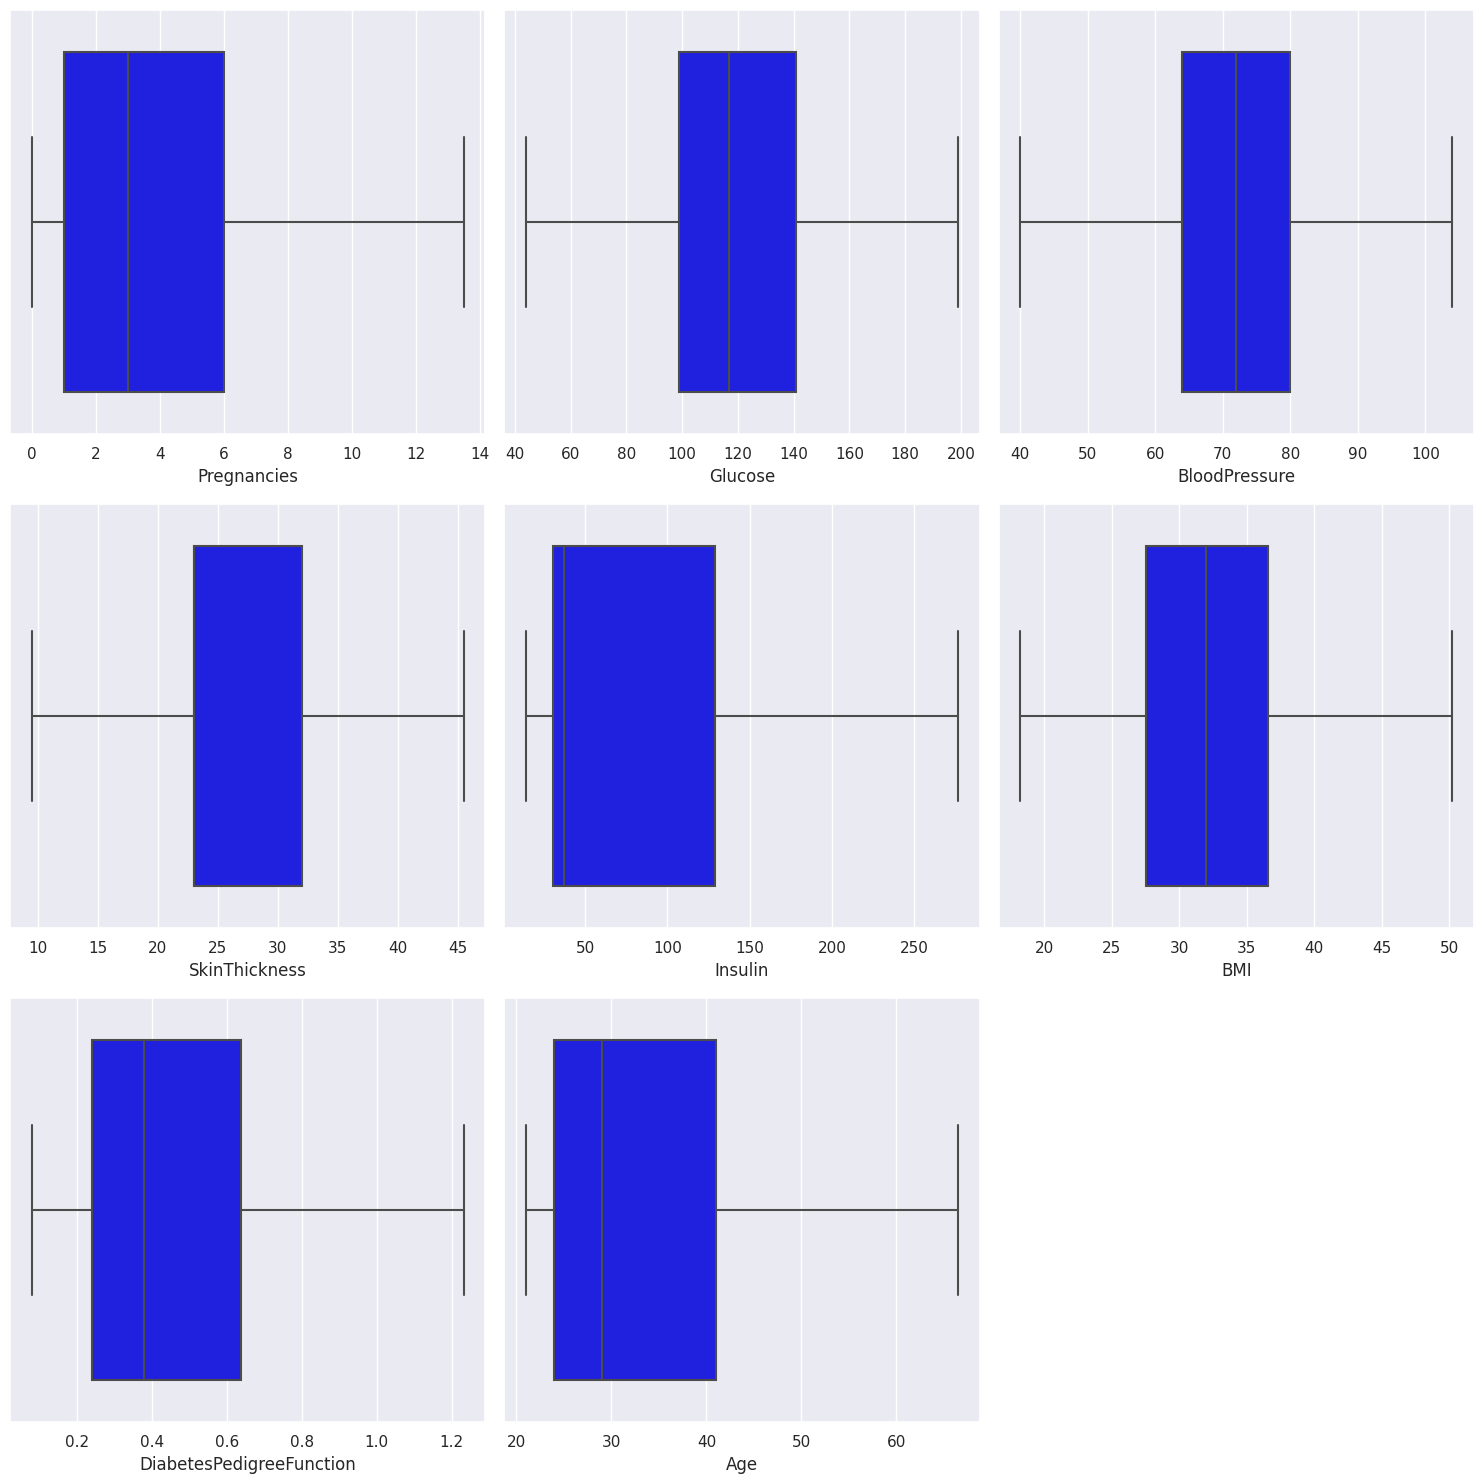

In [ ]:
### Diagrama de cajas luego del tratamiento train_s
num_columns = len(train_s.columns)
num_rows = (num_columns + 2) // 3
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
for i, column in enumerate(train_s.columns):
    if train_s[column].dtype != 'category':
        row = i // 3
        col = i % 3
        ax = axes[row, col]
        sns.boxplot(x=column, data=train_s, color='blue', ax=ax)
        ax.set_xlabel(column)
empty_ax = axes[-1, -1]
empty_ax.axis('off')
plt.tight_layout()
plt.show()

<div class="comment" style="background-color: rgb(255, 255, 224); padding: 10px; border: 2px ridge red;">
Se reemplazaron los valores atípicos usando el Rango Intercuartílico.
</div>

### 6. Pre-selección de variables

In [ ]:
dfgini = pd.DataFrame({'feature': features,
                       'gini': [roc_auc_score(train.Outcome, train[col])*2-1 for col in features]})

dfgini['gini_abs'] = dfgini.gini.apply(lambda x: abs(x))

dfgini.sort_values(by = 'gini_abs', ascending = False)

,feature,gini,gini_abs
1,Glucose,0.534765,0.534765
7,Age,0.347121,0.347121
5,BMI,0.343417,0.343417
3,SkinThickness,0.215344,0.215344
0,Pregnancies,0.207407,0.207407
6,DiabetesPedigreeFunction,0.201899,0.201899
2,BloodPressure,0.194024,0.194024
4,Insulin,0.113648,0.113648


In [ ]:
dfgini_s = pd.DataFrame({'feature': features,
                       'gini': [roc_auc_score(train_s.Outcome, train_s[col])*2-1 for col in features]})

dfgini_s['gini_abs'] = dfgini_s.gini.apply(lambda x: abs(x))

dfgini_s.sort_values(by = 'gini_abs', ascending = False)

,feature,gini,gini_abs
1,Glucose,0.601100,0.601100
5,BMI,0.373063,0.373063
7,Age,0.326692,0.326692
3,SkinThickness,0.248067,0.248067
2,BloodPressure,0.208144,0.208144
0,Pregnancies,0.192834,0.192834
6,DiabetesPedigreeFunction,0.169778,0.169778
4,Insulin,0.058029,0.058029


<div class="comment" style="background-color: rgb(255, 255, 224); padding: 10px; border: 2px ridge red;">
Se observa un GINI positivo para todas las variables con respecto al target, lo cual hace sentido ya que un nivel alto de cada una de estas variables contribuye o tiene implicancia en el desarrollo de diabetes en un paciente. Además como el GINI Absoluto es mayor a 0.05 en todas las variables, ninguna se descarta tanto para el train como para el train_s.
</div>

### 7. Estandarización de datos

In [ ]:
scaler = StandardScaler()
numeric_columns = train.select_dtypes(include=['float64', 'int64']).columns
train[numeric_columns] = scaler.fit_transform(train[numeric_columns])

scaler = StandardScaler()
numeric_columns = test.select_dtypes(include=['float64', 'int64']).columns
test[numeric_columns] = scaler.fit_transform(test[numeric_columns])

scaler = StandardScaler()
numeric_columns = train_s.select_dtypes(include=['float64', 'int64']).columns
train_s[numeric_columns] = scaler.fit_transform(train_s[numeric_columns])

scaler = StandardScaler()
numeric_columns = test_s.select_dtypes(include=['float64', 'int64']).columns
test_s[numeric_columns] = scaler.fit_transform(test_s[numeric_columns])

In [ ]:
train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
429,-0.849429,-0.854765,0.837195,-0.268552,1.189749,0.389076,-0.768151,0.831137,1
524,-0.244063,0.131856,-1.237760,-0.501529,-0.736041,-0.123054,-1.061772,-0.795895,0
212,0.966669,1.907772,1.961128,0.430378,-0.736041,0.268575,-1.015222,2.286903,0
558,2.177401,-0.591666,-0.373196,1.478773,-0.736041,2.076092,-1.151290,0.745504,0
66,-1.152112,-0.394342,1.355933,0.313890,-0.736041,0.012510,1.459067,0.402971,1
...,...,...,...,...,...,...,...,...,...
98,0.663986,-0.920540,-1.929412,0.313890,-0.304509,-0.559870,-0.327721,-0.881528,0
322,-1.152112,0.098968,-0.200283,-0.850994,-0.736041,-0.755684,-0.692956,0.231704,1
382,-0.849429,-0.394342,-1.064847,-2.248855,1.215512,-1.056937,1.788495,-1.052795,0
365,0.361303,-0.723215,-1.583586,0.080913,-0.059760,0.238450,0.184325,-0.282095,0


In [ ]:
train_s

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
323,2.680388,0.995678,1.484190,0.702291,-0.749912,-0.832386,0.919946,0.825517,1
448,-1.133674,-0.563627,-0.718197,1.169904,-0.286628,0.165199,0.158944,-0.950400,1
84,0.333273,0.508395,2.670090,-0.466743,-0.730057,2.395093,-0.815553,0.318112,1
529,-1.133674,-0.336228,-0.633490,-0.466743,-0.730057,-1.155134,0.675461,-0.189293,0
329,0.626662,-0.531141,-0.209954,0.585388,-0.233682,-0.245571,-1.177115,0.318112,0
...,...,...,...,...,...,...,...,...,...
327,1.800220,1.872786,-0.209954,-0.466743,-0.730057,0.385254,-0.908526,0.318112,0
57,-1.133674,-0.693569,1.314775,2.163583,0.322259,2.101686,1.715384,-0.189293,0
112,-0.840285,-1.050909,0.298289,0.819194,-0.644019,-0.186890,-0.936074,-0.865832,0
751,-0.840285,-0.011373,0.467704,1.403711,-0.154262,0.957398,-0.698475,-0.442995,0


<div class="comment" style="background-color: rgb(255, 255, 224); padding: 10px; border: 2px ridge red;">
Se realizó una estandarización de los datos ya que las escalas entre las variables eran muy diferentes.
</div>

### 8. KNN

In [ ]:
def knn_model(x_train, y_train, x_train_s, y_train_s,k_list):
  for k in k_list:

    # Crear un objeto KNeighborsRegressor
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train, y_train)

    knn_s = KNeighborsClassifier(n_neighbors = k)
    knn_s.fit(x_train_s, y_train_s)

    # Realizar predicciones en el conjunto de prueba
    y_train_pred = knn.predict(x_train)
    y_test_pred = knn.predict(x_test)
    y_train_s_pred = knn_s.predict(x_train_s)
    y_test_s_pred = knn_s.predict(x_test_s)

    # Calcular la precisión del modelo (train)
    accuracy_train = accuracy_score(y_train, y_train_pred)
    precision_train = precision_score(y_train, y_train_pred)
    recall_train = recall_score(y_train, y_train_pred)
    f1_train= f1_score(y_train, y_train_pred)

    # Calcular la precisión del modelo (test)
    accuracy_test = accuracy_score(y_test, y_test_pred)
    precision_test = precision_score(y_test, y_test_pred)
    recall_test = recall_score(y_test, y_test_pred)
    f1_test = f1_score(y_test, y_test_pred)

    # Calcular la precisión del modelo (train_s)
    accuracy_train_s = accuracy_score(y_train_s, y_train_s_pred)
    precision_train_s = precision_score(y_train_s, y_train_s_pred)
    recall_train_s = recall_score(y_train_s, y_train_s_pred)
    f1_train_s = f1_score(y_train_s, y_train_s_pred)

    # Calcular la precisión del modelo (test_s)
    accuracy_test_s = accuracy_score(y_test_s, y_test_s_pred)
    precision_test_s = precision_score(y_test_s, y_test_s_pred)
    recall_test_s = recall_score(y_test_s, y_test_s_pred)
    f1_test_s = f1_score(y_test_s, y_test_s_pred)

    ### Resultados de las métricas
    metrics = [[k, 'train', precision_train, accuracy_train, recall_train, f1_train],
              [k, 'train_s', precision_train_s, accuracy_train_s, recall_train_s, f1_train_s],
              [k, 'test', precision_test, accuracy_test, recall_test, f1_test],
              [k, 'test_s', precision_test_s, accuracy_test_s, recall_test_s, f1_test_s]]
    columns = ['k', 'dataset', 'Precision', 'Accuracy', 'Recall', 'F1']
    results_k = pd.DataFrame(metrics, columns=columns)
    results_k[results_k.select_dtypes(include=['float64', 'int64']).columns] = results_k.select_dtypes(include=['float64', 'int64']).round(3)
    print("k =",k)
    print("")
    print(results_k)
    print("")
    if k == min(k_list):
      results = results_k
    else:
      results = pd.concat([results, results_k], axis=0)

  results = results.reset_index(drop=True)
  return results

In [ ]:
x_train = train[numeric_columns]
y_train = train.Outcome

x_test = test[numeric_columns]
y_test = test.Outcome

x_train_s = train_s[numeric_columns]
y_train_s = train_s.Outcome

x_test_s = test_s[numeric_columns]
y_test_s = test_s.Outcome

k_list = [3,5,7,9,11,15,25,35]
results = knn_model(x_train, y_train, x_train_s, y_train_s,k_list)

k = 3

   k  dataset  Precision  Accuracy  Recall     F1
0  3    train      0.805     0.840   0.689  0.743
1  3  train_s      0.810     0.853   0.754  0.781
2  3     test      0.733     0.771   0.625  0.675
3  3   test_s      0.697     0.762   0.568  0.626

k = 5

   k  dataset  Precision  Accuracy  Recall     F1
0  5    train      0.767     0.814   0.639  0.697
1  5  train_s      0.753     0.797   0.620  0.680
2  5     test      0.712     0.753   0.591  0.646
3  5   test_s      0.766     0.797   0.605  0.676

k = 7

   k  dataset  Precision  Accuracy  Recall     F1
0  7    train      0.785     0.808   0.589  0.673
1  7  train_s      0.763     0.801   0.620  0.684
2  7     test      0.714     0.749   0.568  0.633
3  7   test_s      0.719     0.771   0.568  0.634

k = 9

   k  dataset  Precision  Accuracy  Recall     F1
0  9    train      0.776     0.803   0.578  0.662
1  9  train_s      0.745     0.780   0.561  0.640
2  9     test      0.731     0.753   0.557  0.632
3  9   test_s      

<div class="comment" style="background-color: rgb(255, 255, 224); padding: 10px; border: 2px ridge red;">
Se realizó el entrenamiento del modelo con train y train_s, eligiendo valores para k dentro de [3,5,7,9,11,15,25,35]. Se está utilizando 4 métricas para la evaluación del desempeño del modelo por cada k escogido: Precision, Accuracy, Recall, F1.
</div>

###9. Resultados

Para detección temprana: score = 2(Precision) + Accuracy + 2(Recall) + F1-Score

| Métrica | Sentido | Peso |
|--------|------|--------|
| Precision | **⬆ 📈** | 2 |
| Accuracy | **⬆ 📈** | 1 |
| Recall | **⬆ 📈** | 2 |
| F1-Score | **⬆ 📈** | 1 |

<div class="comment" style="background-color: rgb(255, 255, 224); padding: 10px; border: 2px ridge red;">

Se definen la métrica "score" que asigna pesos a cada métrica a fin de potenciar la detección temprana de la Diabetes:

- En este escenario el uso del modelo es para lograr una mejor detección temprana de la Diabetes, es decir, que se priorice tener más falsos positivos que falsos negativos. En este escenario es preferible decirle a un paciente que tiene diabetes cuando en realidad no lo padece, puesto que con análisis complementarios se podría llegar a descartar.
</div>

In [ ]:
results['score'] = 2*results.Precision + results.Accuracy + 2*results.Recall + results.F1

In [ ]:
results.loc[results[results['dataset'].isin(['train', 'train_s'])].groupby('dataset')['score'].idxmax()]

,k,dataset,Precision,Accuracy,Recall,F1,score
0,3,train,0.805,0.840,0.689,0.743,4.571
1,3,train_s,0.810,0.853,0.754,0.781,4.762


In [ ]:
results.loc[results[results['dataset'].isin(['test', 'test_s'])].groupby('dataset')['score'].idxmax()]

,k,dataset,Precision,Accuracy,Recall,F1,score
2,3,test,0.733,0.771,0.625,0.675,4.162
23,15,test_s,0.781,0.805,0.617,0.690,4.291


<div class="comment" style="background-color: rgb(255, 255, 224); padding: 10px; border: 2px ridge red;">

- Se observa que mayor score_1 presenta el train_s con un k=3 y el test_s con un k=15
</div>

In [ ]:
results_1 = results.loc[results[results['dataset'].isin(['test', 'test_s'])].groupby('dataset')['score'].idxmax()]
max_score_1 = results_1['score'].max()
k_with_max_score_1 = results_1.loc[results_1['score'] == max_score_1, 'k'].tolist()

<div class="comment" style="background-color: rgb(255, 255, 224); padding: 10px; border: 2px ridge red;">

- Escenario:
  - Se escoge como data de entrenamiento al train_s (estratificación) ya que presenta un mayor score respecto al train (sin estratificación).
  - Se escoge como k=15 el valor óptimo de k.
</div>

####Escenario

Clases: [0 1]
Número de vecinos: 15
Tipo de ponderación: uniform
Métrica de distancia: euclidean


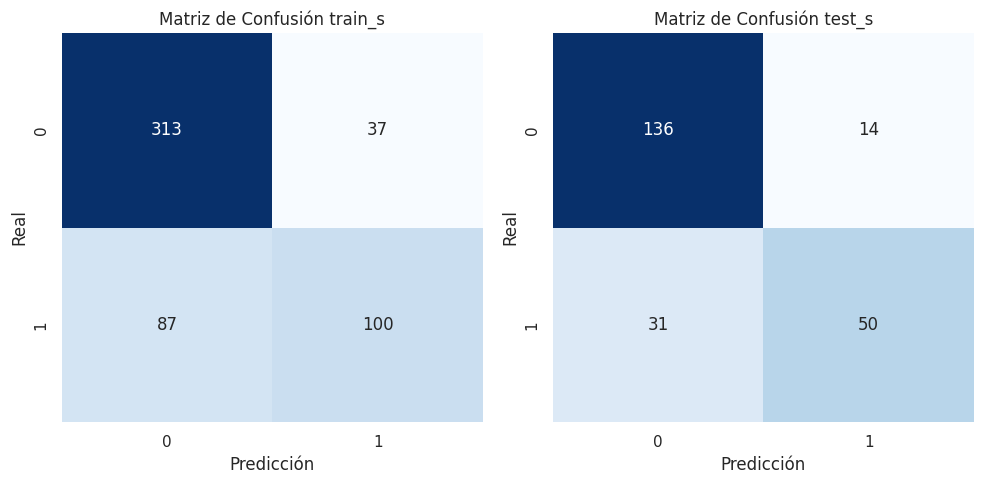

,k,dataset,Precision,Accuracy,Recall,F1,score
0,15,train_s,0.730,0.769,0.535,0.617,3.916
1,15,test_s,0.781,0.805,0.617,0.690,4.291


In [ ]:
knn = KNeighborsClassifier(n_neighbors = k_with_max_score_1[0])
knn.fit(x_train_s, y_train_s)
print("Clases:", knn.classes_)
print("Número de vecinos:", knn.n_neighbors)
print("Tipo de ponderación:", knn.weights)
print("Métrica de distancia:", knn.effective_metric_)

### Predicción
y_train_s_pred = knn.predict(x_train_s)
y_test_s_pred = knn.predict(x_test_s)

### Métricas
knn_metrics = results.loc[(results['dataset'].isin(['train_s', 'test_s'])) & (results['k'].isin(k_with_max_score_1))].reset_index(drop=True)

### Matriz de confusión
confusion_train_s = confusion_matrix(y_train_s, y_train_s_pred)
confusion_test_s = confusion_matrix(y_test_s, y_test_s_pred)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
titles = ['Matriz de Confusión train_s', 'Matriz de Confusión test_s']
for i, ax in enumerate(axes.flatten()):
    if i == 0:
        sns.heatmap(confusion_train_s, annot=True, cmap='Blues', cbar=False, ax=ax, fmt='.0f')
    elif i == 1:
        sns.heatmap(confusion_test_s, annot=True, cmap='Blues', cbar=False, ax=ax, fmt='.0f')
    ax.set_title(titles[i])
    ax.set_xlabel('Predicción')
    ax.set_ylabel('Real')
plt.tight_layout()
plt.show()
knn_metrics

## COMPARATIVA DE MODELOS

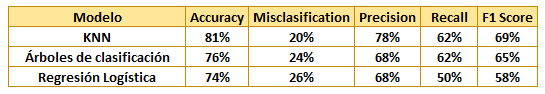

<div class="comment" style="background-color: rgb(255, 255, 224); padding: 10px; border: 2px ridge red;">

De acuerdo a las métricas calculadas en los resultados de los modelos desarrollados, en el contexto de resaltar la importancia de una detección temprana de la Diabetes, se opta por el modelo utilizando la técnica KNN ( k-nearest neighbors).
</div>

## Guardar modelo

In [ ]:
joblib.dump(knn, 'modelo_knn.pkl')

['modelo_knn.pkl']

## Conclusiones

<div class="comment" style="background-color: rgb(255, 255, 224); padding: 10px; border: 2px ridge red;">

- El modelo de regresión logística reveló que las variables Glucose, BMI, Pregnancies y DiabetesPedigreeFunction son significativas para predecir la variable objetivo. Siendo Glucose la variable más influyente con un peso del 47%.
- Se logró verificar el rendimiento del modelo de regresión logística utilizando los datos de prueba (test) y algunas métricas como Accuracy, Precision, Recall, F1 score.
- El modelo de árboles …
- De acuerdo a la importancia de detectar tempranamente la Diabetes, se definió un score para elegir los parámetros óptimos del modelo de KNN, resultando mejor la aplicación de una estratificación al muestreo y eligiendo como k óptimo el valor de 15.
- El modelo propuesto que favorece al cumplimiento de los objetivos es KNN con un accuracy del 81%, para un k = 15 y aplicando una estratificación al muestreo, además de incluir las 8 variables predictoras, resaltando Glucose, BMI y Age las que más contribuyeron al modelo.

</div>

## Recomendaciones

<div class="comment" style="background-color: rgb(255, 255, 224); padding: 10px; border: 2px ridge red;">

- Evaluar la aplicación de otros tratamientos de valores missing.
- Evaluar la aplicación de otros tratamientos de outliers.
- Evaluar la aplicación de una estandarización o transformación selectiva, acorde a la distribución de cada variable.
- Evaluar muchos más valores de k para entrenar el modelo KNN.
- Evaluar obtener un dataset más amplio donde se tenga una mejor proporción entre pacientes con Diabetes o no, y considerar nuevas variables.
</div>